In [11]:
# from google.colab import drive
# drive.mount('/content/drive')
! pip3 install lightgbm

     |████████████████████████████████| 1.2 MB 1.3 MB/s eta 0:00:01


In [12]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import savgol_filter
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression,LinearRegression,SGDRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import recall_score,classification_report, confusion_matrix, mean_absolute_error, mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor,AdaBoostRegressor, BaggingRegressor
# from xgboost import XGBRegressor
# from lightgbm import LGBMRegressor
from sklearn.svm import SVR,LinearSVR,NuSVR
from sklearn.tree import DecisionTreeRegressor, ExtraTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import RandomizedSearchCV

In [18]:
data = pd.read_csv('train_FD001.txt', sep = ' ', header = None)
print(data)
data.columns

        0    1       2       3      4       5       6        7        8   \
0        1    1 -0.0007 -0.0004  100.0  518.67  641.82  1589.70  1400.60   
1        1    2  0.0019 -0.0003  100.0  518.67  642.15  1591.82  1403.14   
2        1    3 -0.0043  0.0003  100.0  518.67  642.35  1587.99  1404.20   
3        1    4  0.0007  0.0000  100.0  518.67  642.35  1582.79  1401.87   
4        1    5 -0.0019 -0.0002  100.0  518.67  642.37  1582.85  1406.22   
...    ...  ...     ...     ...    ...     ...     ...      ...      ...   
20626  100  196 -0.0004 -0.0003  100.0  518.67  643.49  1597.98  1428.63   
20627  100  197 -0.0016 -0.0005  100.0  518.67  643.54  1604.50  1433.58   
20628  100  198  0.0004  0.0000  100.0  518.67  643.42  1602.46  1428.18   
20629  100  199 -0.0011  0.0003  100.0  518.67  643.23  1605.26  1426.53   
20630  100  200 -0.0032 -0.0005  100.0  518.67  643.85  1600.38  1432.14   

          9   ...       18      19    20   21    22     23     24       25  \
0      14

Int64Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
            17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27],
           dtype='int64')

In [19]:
COLS = ["ID", "Cycle", "OpSet1", "OpSet2", "OpSet3", "SensorMeasure1", "SensorMeasure2", "SensorMeasure3", "SensorMeasure4",
                "SensorMeasure5", "SensorMeasure6", "SensorMeasure7", "SensorMeasure8", "SensorMeasure9", "SensorMeasure10", "SensorMeasure11",
                "SensorMeasure12", "SensorMeasure13", "SensorMeasure14", "SensorMeasure15", "SensorMeasure16",
                "SensorMeasure17", "SensorMeasure18", "SensorMeasure19", "SensorMeasure20", "SensorMeasure21"]

In [20]:
data = data[[f for f in range(0, 26)]]
data.columns = ["ID", "Cycle", "OpSet1", "OpSet2", "OpSet3", "SensorMeasure1", "SensorMeasure2", "SensorMeasure3", "SensorMeasure4",
                "SensorMeasure5", "SensorMeasure6", "SensorMeasure7", "SensorMeasure8", "SensorMeasure9", "SensorMeasure10", "SensorMeasure11",
                "SensorMeasure12", "SensorMeasure13", "SensorMeasure14", "SensorMeasure15", "SensorMeasure16",
                "SensorMeasure17", "SensorMeasure18", "SensorMeasure19", "SensorMeasure20", "SensorMeasure21"]
data

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [21]:
data[data["ID"]==2]

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21
192,2,1,-0.0018,0.0006,100.0,518.67,641.89,1583.84,1391.28,14.62,...,522.33,2388.06,8137.72,8.3905,0.03,391,2388,100.0,38.94,23.4585
193,2,2,0.0043,-0.0003,100.0,518.67,641.82,1587.05,1393.13,14.62,...,522.70,2387.98,8131.09,8.4167,0.03,392,2388,100.0,39.06,23.4085
194,2,3,0.0018,0.0003,100.0,518.67,641.55,1588.32,1398.96,14.62,...,522.58,2387.99,8140.58,8.3802,0.03,391,2388,100.0,39.11,23.4250
195,2,4,0.0035,-0.0004,100.0,518.67,641.68,1584.15,1396.08,14.62,...,522.49,2387.93,8140.44,8.4018,0.03,391,2388,100.0,39.13,23.5027
196,2,5,0.0005,0.0004,100.0,518.67,641.73,1579.03,1402.52,14.62,...,522.27,2387.94,8136.67,8.3867,0.03,390,2388,100.0,39.18,23.4234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
474,2,283,0.0046,0.0002,100.0,518.67,643.78,1602.03,1429.67,14.62,...,520.07,2388.20,8174.85,8.5199,0.03,398,2388,100.0,38.42,23.0358
475,2,284,-0.0006,0.0001,100.0,518.67,643.91,1601.35,1430.04,14.62,...,519.95,2388.21,8166.83,8.5291,0.03,395,2388,100.0,38.23,23.1196
476,2,285,-0.0007,0.0004,100.0,518.67,643.67,1596.84,1431.17,14.62,...,519.91,2388.22,8164.83,8.5242,0.03,396,2388,100.0,38.39,23.1155
477,2,286,-0.0010,-0.0003,100.0,518.67,643.44,1603.63,1429.57,14.62,...,519.51,2388.22,8169.97,8.4932,0.03,395,2388,100.0,38.33,23.0169


**Information on how many cycles each engine lasts**

---



---



In [22]:
max_cycles_df = data.groupby(["ID"], sort=False)["Cycle"].max().reset_index().rename(columns={"Cycle" : "MaxCycleID"})
max_cycles_df.head(20)

,ID,MaxCycleID
0,1,192
1,2,287
2,3,179
3,4,189
4,5,269
5,6,188
6,7,259
7,8,150
8,9,201
9,10,222


In [23]:
FD001_df = pd.merge(data, max_cycles_df, how="inner", on="ID")
FD001_df["RUL"] = FD001_df["MaxCycleID"] - FD001_df["Cycle"]
FD001_df

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,...,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,MaxCycleID,RUL
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,192,191
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,192,190
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,192,189
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,192,188
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,192,187
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735,200,4
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594,200,3
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333,200,2
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640,200,1


In [24]:
df_FD001 = FD001_df.copy().drop(columns=["ID", "Cycle", "OpSet1", "OpSet2", "OpSet3", "MaxCycleID", "RUL"], axis=1)
scaler = MinMaxScaler(feature_range=(0, 1))
print(df_FD001)
scaled_df_FD001 = pd.DataFrame(scaler.fit_transform(df_FD001.values))
scaled_df_FD001 = FD001_df[["ID", "Cycle", "RUL"]].join(scaled_df_FD001)
scaled_df_FD001.columns = ["ID", "Cycle","RUL", "SensorMeasure1", "SensorMeasure2", "SensorMeasure3", "SensorMeasure4",
                "SensorMeasure5", "SensorMeasure6", "SensorMeasure7", "SensorMeasure8", "SensorMeasure9", "SensorMeasure10", "SensorMeasure11",
                "SensorMeasure12", "SensorMeasure13", "SensorMeasure14", "SensorMeasure15", "SensorMeasure16",
                "SensorMeasure17", "SensorMeasure18", "SensorMeasure19", "SensorMeasure20", "SensorMeasure21"]

       SensorMeasure1  SensorMeasure2  SensorMeasure3  SensorMeasure4  \
0              518.67          641.82         1589.70         1400.60   
1              518.67          642.15         1591.82         1403.14   
2              518.67          642.35         1587.99         1404.20   
3              518.67          642.35         1582.79         1401.87   
4              518.67          642.37         1582.85         1406.22   
...               ...             ...             ...             ...   
20626          518.67          643.49         1597.98         1428.63   
20627          518.67          643.54         1604.50         1433.58   
20628          518.67          643.42         1602.46         1428.18   
20629          518.67          643.23         1605.26         1426.53   
20630          518.67          643.85         1600.38         1432.14   

       SensorMeasure5  SensorMeasure6  SensorMeasure7  SensorMeasure8  \
0               14.62           21.61          554

In [25]:
scaled_df_FD001

,ID,Cycle,RUL,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,SensorMeasure7,...,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21
0,1,1,191,0.0,0.183735,0.406802,0.309757,0.0,1.0,0.726248,...,0.633262,0.205882,0.199608,0.363986,0.0,0.333333,0.0,0.0,0.713178,0.724662
1,1,2,190,0.0,0.283133,0.453019,0.352633,0.0,1.0,0.628019,...,0.765458,0.279412,0.162813,0.411312,0.0,0.333333,0.0,0.0,0.666667,0.731014
2,1,3,189,0.0,0.343373,0.369523,0.370527,0.0,1.0,0.710145,...,0.795309,0.220588,0.171793,0.357445,0.0,0.166667,0.0,0.0,0.627907,0.621375
3,1,4,188,0.0,0.343373,0.256159,0.331195,0.0,1.0,0.740741,...,0.889126,0.294118,0.174889,0.166603,0.0,0.333333,0.0,0.0,0.573643,0.662386
4,1,5,187,0.0,0.349398,0.257467,0.404625,0.0,1.0,0.668277,...,0.746269,0.235294,0.174734,0.402078,0.0,0.416667,0.0,0.0,0.589147,0.704502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,4,0.0,0.686747,0.587312,0.782917,0.0,1.0,0.254428,...,0.170576,0.558824,0.194344,0.656791,0.0,0.750000,0.0,0.0,0.271318,0.109500
20627,100,197,3,0.0,0.701807,0.729453,0.866475,0.0,1.0,0.162641,...,0.211087,0.500000,0.188668,0.727203,0.0,0.583333,0.0,0.0,0.124031,0.366197
20628,100,198,2,0.0,0.665663,0.684979,0.775321,0.0,1.0,0.175523,...,0.281450,0.529412,0.212148,0.922278,0.0,0.833333,0.0,0.0,0.232558,0.053991
20629,100,199,1,0.0,0.608434,0.746021,0.747468,0.0,1.0,0.133655,...,0.208955,0.514706,0.203065,0.823394,0.0,0.583333,0.0,0.0,0.116279,0.234466


/Users/shivam.bhardwaj/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


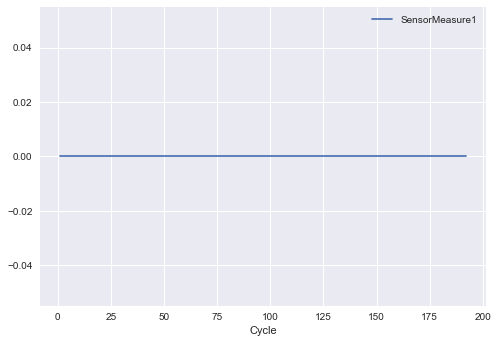

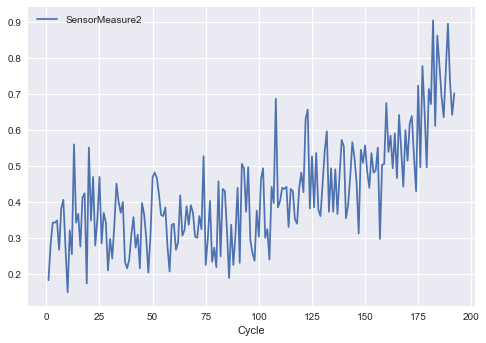

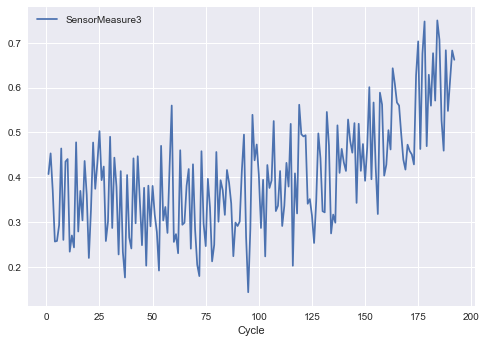

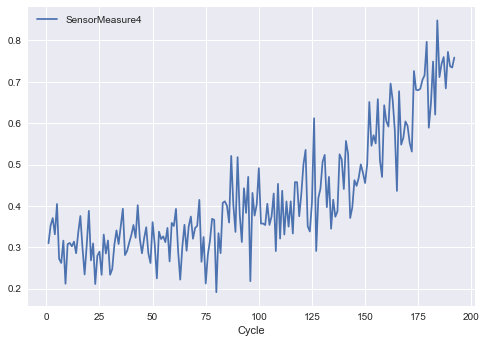

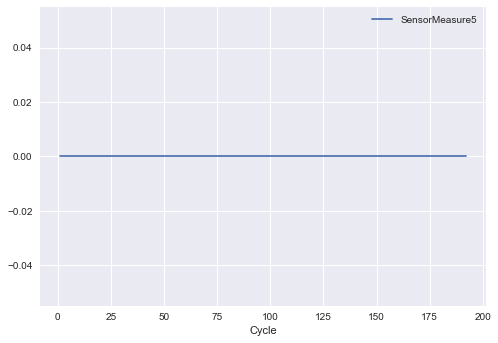

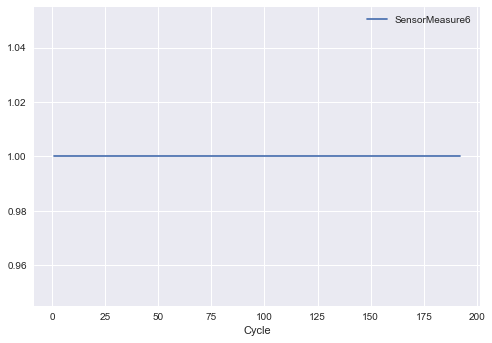

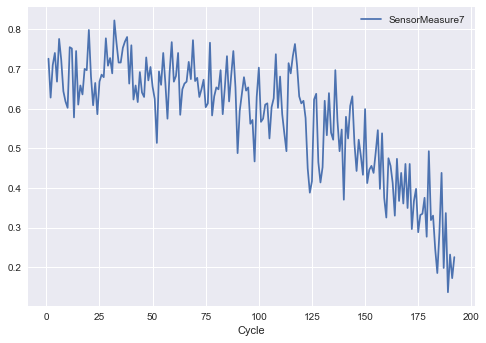

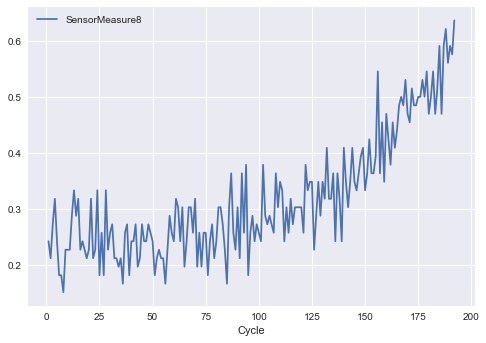

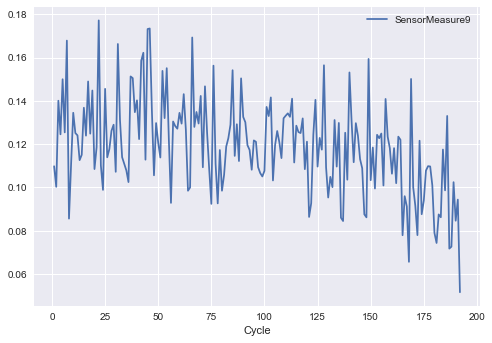

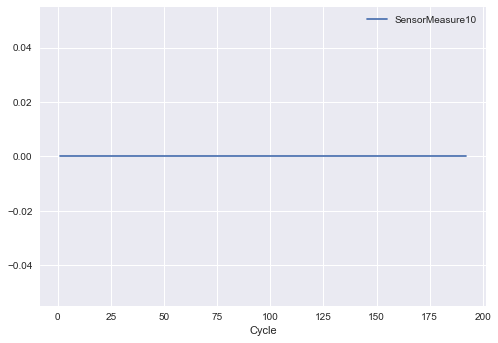

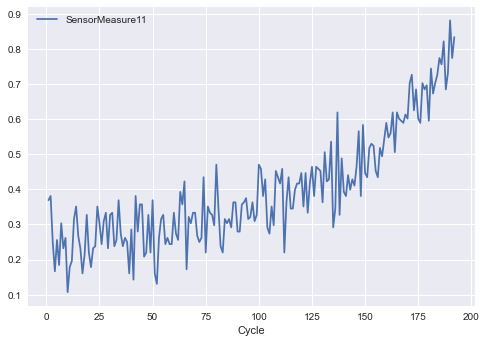

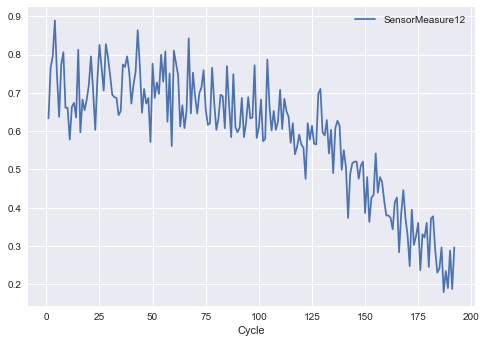

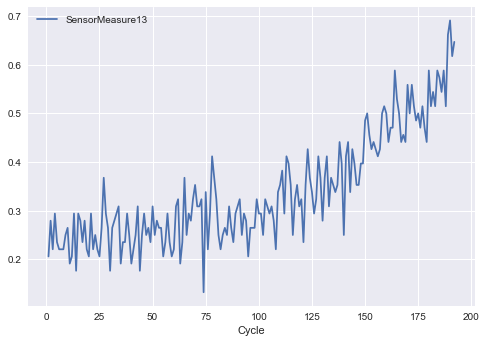

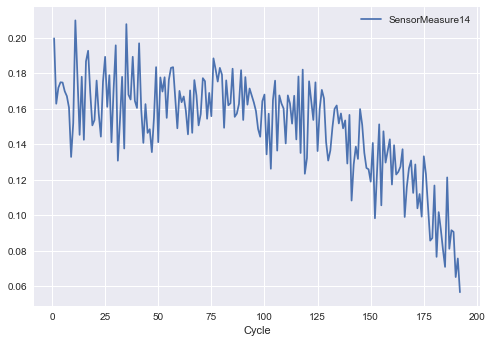

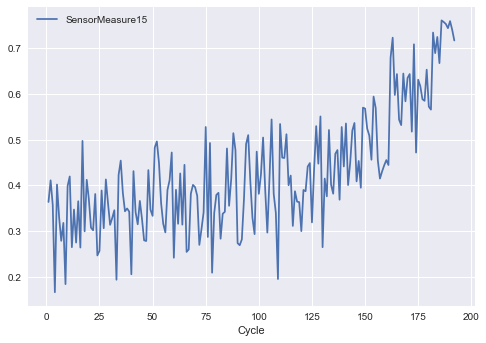

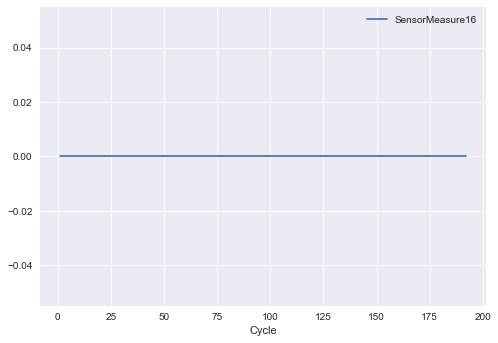

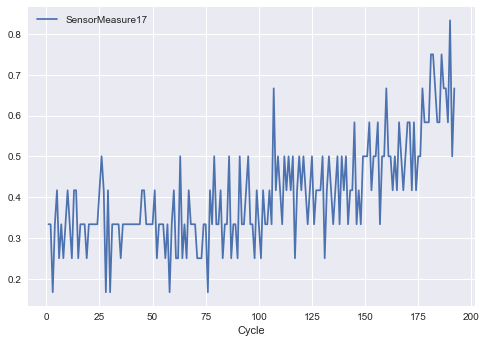

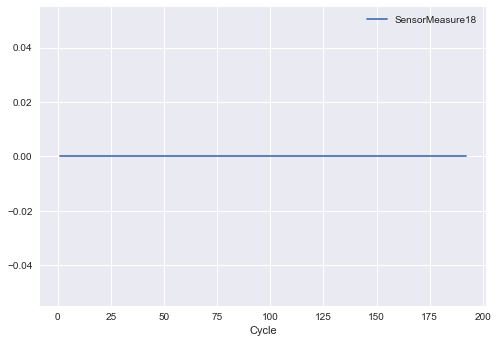

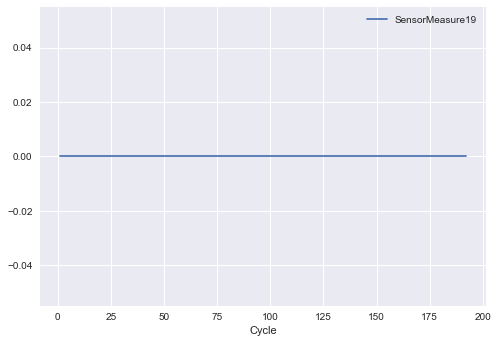

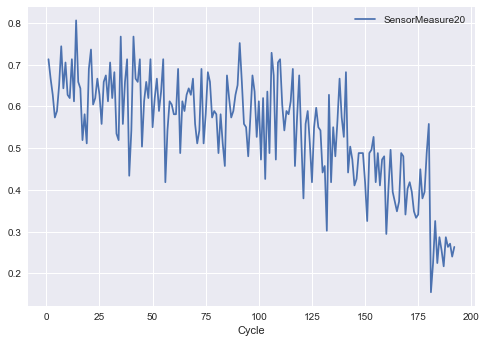

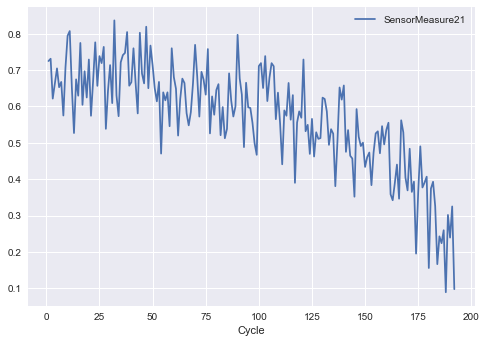

In [26]:
plt.style.use("seaborn")
sensor_count = 21
engine_id = 1
for i in range(1, sensor_count+1):
    y_value = "SensorMeasure" + str(i)
    scaled_df_FD001[scaled_df_FD001["ID"]==engine_id].plot(x="Cycle", y=y_value)

In [ ]:
scaled_clean_df_FD001 = scaled_df_FD001.drop(columns=["SensorMeasure1", "SensorMeasure5", "SensorMeasure6", "SensorMeasure10",
                                         "SensorMeasure16", "SensorMeasure18", "SensorMeasure19"])
scaled_clean_df_FD001

,ID,Cycle,RUL,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure7,SensorMeasure8,SensorMeasure9,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure17,SensorMeasure20,SensorMeasure21
0,1,1,191,0.183735,0.406802,0.309757,0.726248,0.242424,0.109755,0.369048,0.633262,0.205882,0.199608,0.363986,0.333333,0.713178,0.724662
1,1,2,190,0.283133,0.453019,0.352633,0.628019,0.212121,0.100242,0.380952,0.765458,0.279412,0.162813,0.411312,0.333333,0.666667,0.731014
2,1,3,189,0.343373,0.369523,0.370527,0.710145,0.272727,0.140043,0.250000,0.795309,0.220588,0.171793,0.357445,0.166667,0.627907,0.621375
3,1,4,188,0.343373,0.256159,0.331195,0.740741,0.318182,0.124518,0.166667,0.889126,0.294118,0.174889,0.166603,0.333333,0.573643,0.662386
4,1,5,187,0.349398,0.257467,0.404625,0.668277,0.242424,0.149960,0.255952,0.746269,0.235294,0.174734,0.402078,0.416667,0.589147,0.704502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,4,0.686747,0.587312,0.782917,0.254428,0.439394,0.196491,0.726190,0.170576,0.558824,0.194344,0.656791,0.750000,0.271318,0.109500
20627,100,197,3,0.701807,0.729453,0.866475,0.162641,0.500000,0.194651,0.708333,0.211087,0.500000,0.188668,0.727203,0.583333,0.124031,0.366197
20628,100,198,2,0.665663,0.684979,0.775321,0.175523,0.515152,0.198196,0.738095,0.281450,0.529412,0.212148,0.922278,0.833333,0.232558,0.053991
20629,100,199,1,0.608434,0.746021,0.747468,0.133655,0.530303,0.233285,0.916667,0.208955,0.514706,0.203065,0.823394,0.583333,0.116279,0.234466


In [ ]:
cycle_counts_FD001 = scaled_clean_df_FD001.groupby("ID")["Cycle"].max().reset_index()
print(type(cycle_counts_FD001))
cycle_counts_FD001

<class 'pandas.core.frame.DataFrame'>


,ID,Cycle
0,1,192
1,2,287
2,3,179
3,4,189
4,5,269
...,...,...
95,96,336
96,97,202
97,98,156
98,99,185


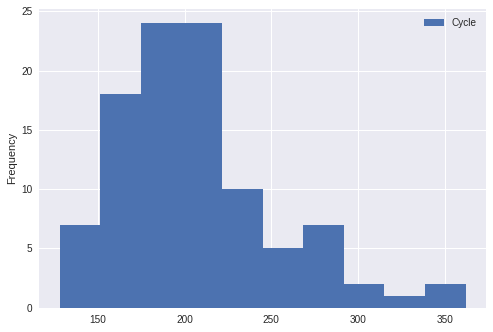

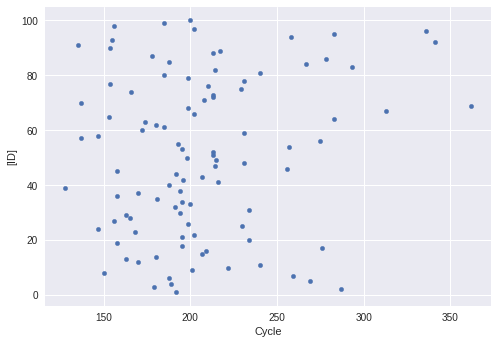

In [ ]:
cycle_counts_FD001.plot(x="ID", y=["Cycle"], kind="hist")
cycle_counts_FD001.plot.scatter(x="Cycle", y=["ID"])

In [ ]:
standart_deviations_FD001 = scaled_clean_df_FD001.groupby("ID").std().reset_index().drop(columns=["Cycle"])
standart_deviations_FD001

,ID,RUL,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure7,SensorMeasure8,SensorMeasure9,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure17,SensorMeasure20,SensorMeasure21
0,1,55.569776,0.146625,0.125567,0.144592,0.146605,0.107445,0.022040,0.159730,0.159739,0.113177,0.028708,0.131299,0.122972,0.129456,0.145127
1,2,82.993976,0.168739,0.143814,0.164369,0.151486,0.095456,0.056052,0.174805,0.170441,0.093913,0.044809,0.158244,0.137273,0.154521,0.158514
2,3,51.816986,0.142828,0.139224,0.145343,0.118194,0.060541,0.157932,0.144292,0.126820,0.060616,0.151923,0.140900,0.130898,0.128769,0.144621
3,4,54.703748,0.132966,0.133184,0.130612,0.114062,0.049289,0.164102,0.132574,0.113040,0.051204,0.158385,0.122919,0.133571,0.123490,0.129528
4,5,77.797815,0.166127,0.153927,0.165131,0.144241,0.084124,0.096042,0.170083,0.160618,0.083008,0.085046,0.148742,0.145005,0.145064,0.155627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,97.139076,0.150910,0.127605,0.148397,0.139220,0.092397,0.031384,0.155270,0.150801,0.089307,0.021570,0.138400,0.126088,0.139889,0.146912
96,97,58.456537,0.142748,0.134400,0.129455,0.108132,0.061978,0.181444,0.124187,0.113887,0.053248,0.174824,0.130981,0.130123,0.132528,0.128832
97,98,45.177428,0.158405,0.137612,0.164611,0.144709,0.118285,0.022617,0.176837,0.165183,0.109145,0.030238,0.137621,0.117308,0.137339,0.148369
98,99,53.549043,0.151268,0.124649,0.149093,0.142856,0.110141,0.017695,0.162936,0.162562,0.103868,0.021488,0.145633,0.123029,0.130080,0.146928


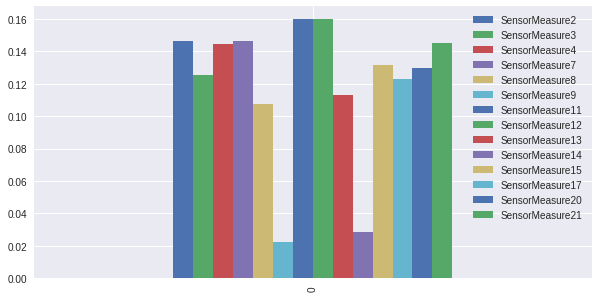

In [ ]:
engine_id = 1
standart_deviations_FD001[standart_deviations_FD001["ID"]==engine_id].plot(y=["SensorMeasure2","SensorMeasure3","SensorMeasure4","SensorMeasure7",
                                                                 "SensorMeasure8","SensorMeasure9","SensorMeasure11","SensorMeasure12",
                                                                 "SensorMeasure13","SensorMeasure14","SensorMeasure15","SensorMeasure17",
                                                                 "SensorMeasure20","SensorMeasure21"], kind="bar", figsize=(10, 5))

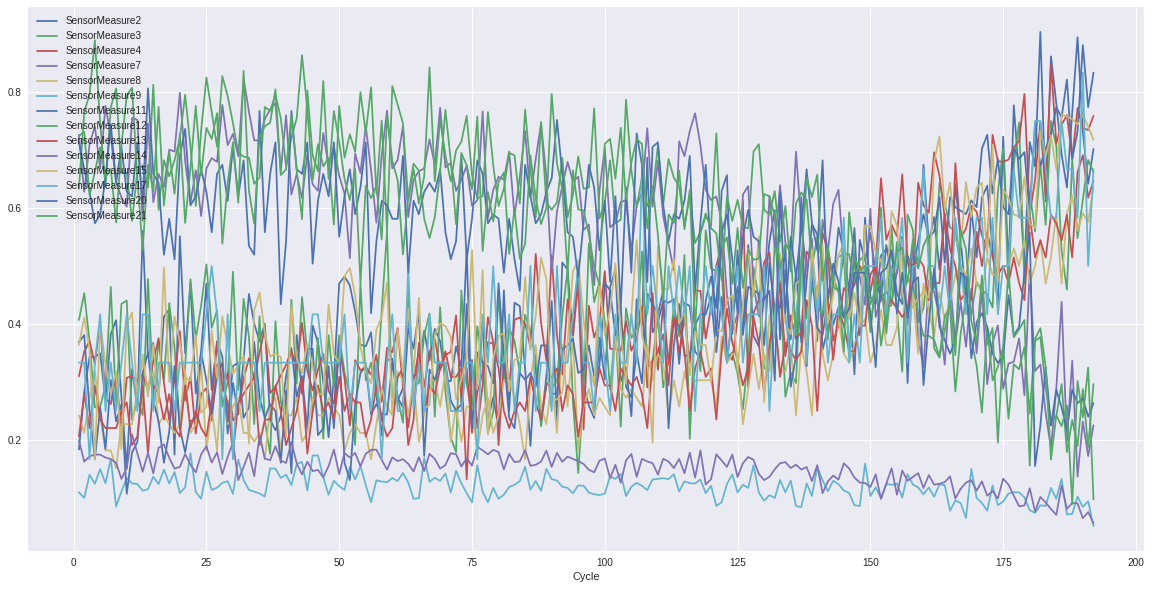

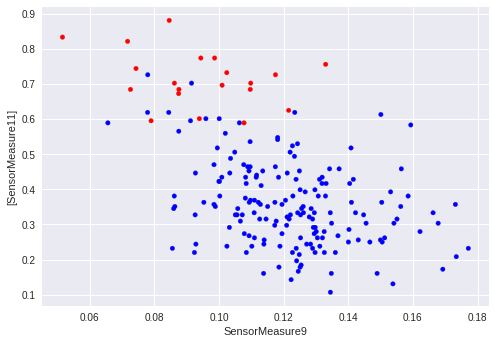

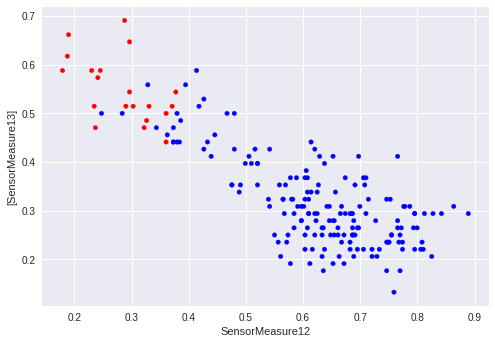

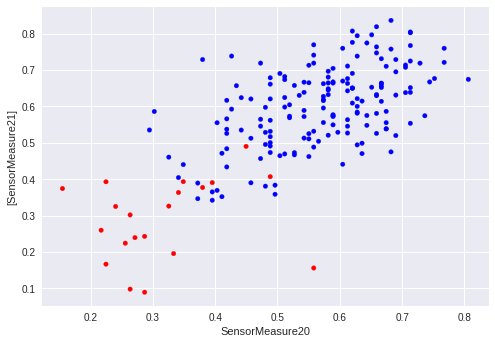

In [ ]:
sensors = ["SensorMeasure2","SensorMeasure3","SensorMeasure4","SensorMeasure7",
           "SensorMeasure8","SensorMeasure9","SensorMeasure11","SensorMeasure12",
           "SensorMeasure13","SensorMeasure14","SensorMeasure15","SensorMeasure17",
           "SensorMeasure20","SensorMeasure21"]

engine_to_check = 1

scaled_clean_df_FD001[scaled_clean_df_FD001["ID"]==engine_to_check].plot(x="Cycle", y=sensors, figsize=(20, 10))
rul_fixed_df_FD001 = scaled_clean_df_FD001.copy()
rul_fixed_df_FD001.loc[rul_fixed_df_FD001["RUL"] < 20, "RUL"] = 1
rul_fixed_df_FD001.loc[rul_fixed_df_FD001["RUL"] >= 20, "RUL"] = 0
rul_fixed_df_FD001.head(10)
col = rul_fixed_df_FD001[rul_fixed_df_FD001["ID"]==engine_to_check].RUL.map({1:'r', 0:'b'})
rul_fixed_df_FD001[rul_fixed_df_FD001["ID"]==engine_to_check].plot.scatter(x=sensors[5], y=[sensors[6]], c=col)
rul_fixed_df_FD001[rul_fixed_df_FD001["ID"]==engine_to_check].plot.scatter(x=sensors[7], y=[sensors[8]], c=col)
rul_fixed_df_FD001[rul_fixed_df_FD001["ID"]==engine_to_check].plot.scatter(x=sensors[12], y=[sensors[13]], c=col)

In [ ]:
correlation_df_FD001 = scaled_clean_df_FD001.drop(columns=["ID", "Cycle", "RUL"])
corr_default_FD001 = correlation_df_FD001.corr()
corr_default_FD001

,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure7,SensorMeasure8,SensorMeasure9,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure17,SensorMeasure20,SensorMeasure21
SensorMeasure2,1.000000,0.602610,0.714949,-0.702136,0.662325,0.273764,0.740020,-0.724578,0.661792,0.179752,0.675975,0.629886,-0.661841,-0.668050
SensorMeasure3,0.602610,1.000000,0.678413,-0.664595,0.602481,0.322964,0.695900,-0.680307,0.600963,0.237137,0.639921,0.600017,-0.625941,-0.633901
SensorMeasure4,0.714949,0.678413,1.000000,-0.793130,0.746852,0.297429,0.830136,-0.815591,0.745158,0.190748,0.758459,0.703499,-0.748067,-0.745193
SensorMeasure7,-0.702136,-0.664595,-0.793130,1.000000,-0.767132,-0.217835,-0.822805,0.812713,-0.764611,-0.110053,-0.747051,-0.692893,0.736163,0.737447
SensorMeasure8,0.662325,0.602481,0.746852,-0.767132,1.000000,-0.032091,0.782213,-0.786540,0.826084,-0.144787,0.700949,0.627785,-0.687030,-0.688840
SensorMeasure9,0.273764,0.322964,0.297429,-0.217835,-0.032091,1.000000,0.274591,-0.210238,-0.034763,0.963157,0.293753,0.337110,-0.285280,-0.292795
SensorMeasure11,0.740020,0.695900,0.830136,-0.822805,0.782213,0.274591,1.000000,-0.846884,0.780761,0.163408,0.780913,0.722296,-0.771510,-0.772554
SensorMeasure12,-0.724578,-0.680307,-0.815591,0.812713,-0.786540,-0.210238,-0.846884,1.000000,-0.788441,-0.098141,-0.766052,-0.703485,0.751943,0.756263
SensorMeasure13,0.661792,0.600963,0.745158,-0.764611,0.826084,-0.034763,0.780761,-0.788441,1.000000,-0.147036,0.697662,0.627410,-0.686172,-0.688948
SensorMeasure14,0.179752,0.237137,0.190748,-0.110053,-0.144787,0.963157,0.163408,-0.098141,-0.147036,1.000000,0.193761,0.246621,-0.187364,-0.192415


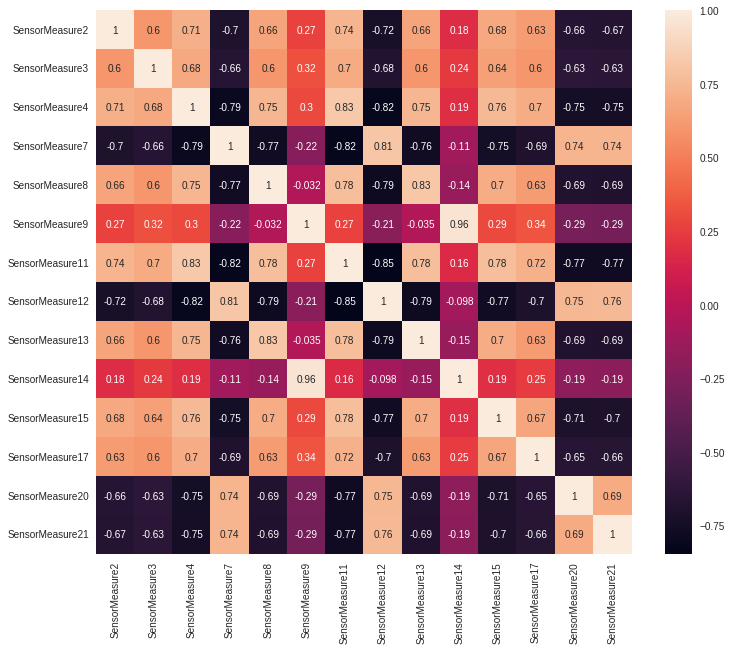

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(corr_default_FD001, annot=True, cmap="rocket")

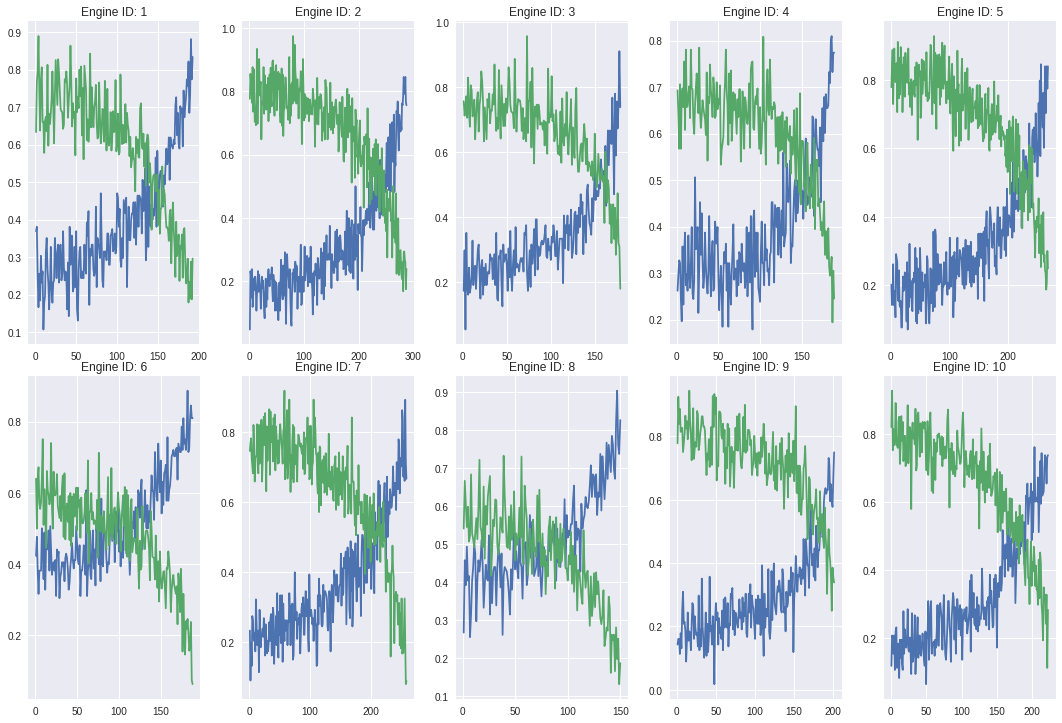

In [ ]:
S1, S2 = "SensorMeasure11", "SensorMeasure12"
fig, axes = plt.subplots(2, 5, figsize=(15, 10))
fig.tight_layout()

for i in range(2):
    for j in range(5):
        df_used = scaled_clean_df_FD001[scaled_clean_df_FD001["ID"]==(5*i+j+1)]
        axes[i][j].plot(df_used["Cycle"], df_used[S1])
        axes[i][j].plot(df_used["Cycle"], df_used[S2])
        axes[i][j].title.set_text("Engine ID: " + str(5*i+j+1))

plt.show()

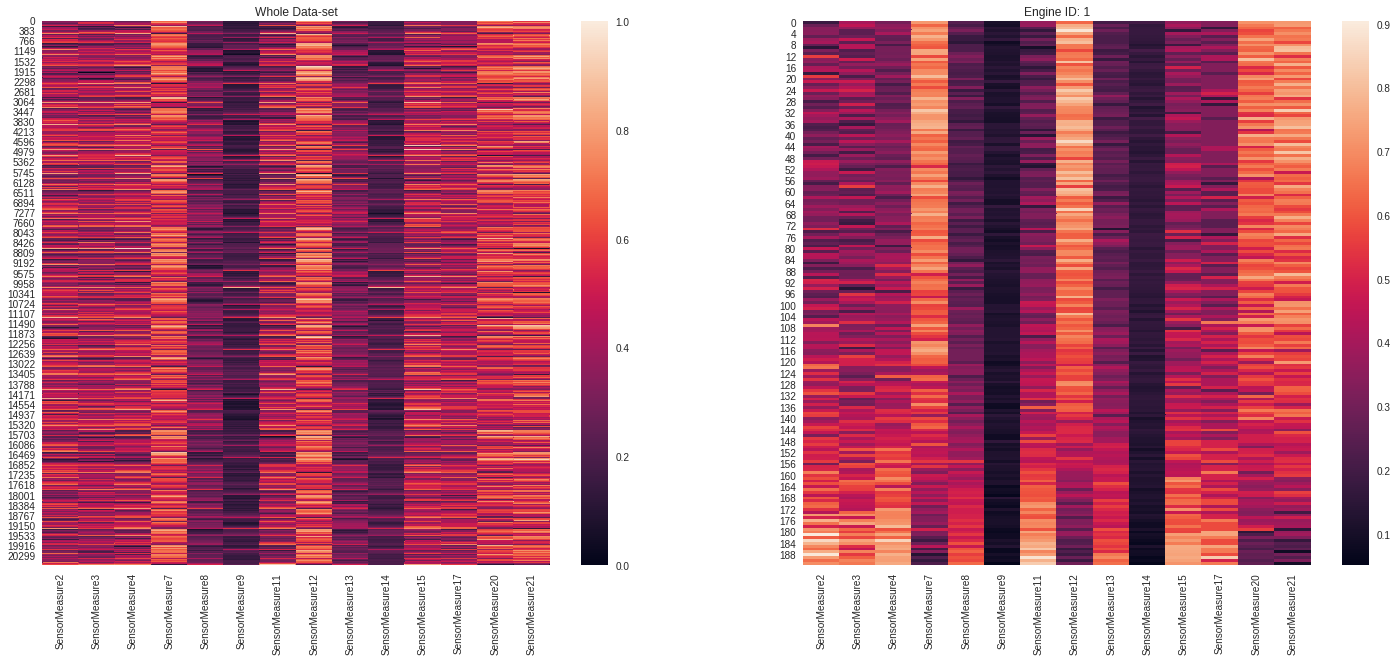

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(25, 10))
axes[0].title.set_text("Whole Data-set")
sns.heatmap(scaled_clean_df_FD001.copy().drop(columns=["ID", "Cycle", "RUL"]), ax=axes[0])

engine_id = 1
axes[1].title.set_text("Engine ID: " + str(engine_id))
sns.heatmap(scaled_clean_df_FD001[scaled_clean_df_FD001["ID"]==engine_id].copy().drop(columns=["ID", "Cycle", "RUL"]), ax=axes[1])

In [ ]:
class_df_FD001 = scaled_clean_df_FD001.copy()
class_df_FD001['HS'] = [0 for x in range(len(class_df_FD001['RUL']))]
class_df_FD001.loc[class_df_FD001["RUL"] <= 10, "HS"] = 'Not Okay'
class_df_FD001.loc[class_df_FD001['RUL'] >= 120, 'HS'] = 'Okay'
class_df_FD001.loc[(class_df_FD001['RUL'] < 120) & (class_df_FD001['RUL'] > 10), 'HS'] = 'Degradation'
class_df_FD001

,ID,Cycle,RUL,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure7,SensorMeasure8,SensorMeasure9,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure17,SensorMeasure20,SensorMeasure21,HS
0,1,1,191,0.183735,0.406802,0.309757,0.726248,0.242424,0.109755,0.369048,0.633262,0.205882,0.199608,0.363986,0.333333,0.713178,0.724662,Okay
1,1,2,190,0.283133,0.453019,0.352633,0.628019,0.212121,0.100242,0.380952,0.765458,0.279412,0.162813,0.411312,0.333333,0.666667,0.731014,Okay
2,1,3,189,0.343373,0.369523,0.370527,0.710145,0.272727,0.140043,0.250000,0.795309,0.220588,0.171793,0.357445,0.166667,0.627907,0.621375,Okay
3,1,4,188,0.343373,0.256159,0.331195,0.740741,0.318182,0.124518,0.166667,0.889126,0.294118,0.174889,0.166603,0.333333,0.573643,0.662386,Okay
4,1,5,187,0.349398,0.257467,0.404625,0.668277,0.242424,0.149960,0.255952,0.746269,0.235294,0.174734,0.402078,0.416667,0.589147,0.704502,Okay
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,4,0.686747,0.587312,0.782917,0.254428,0.439394,0.196491,0.726190,0.170576,0.558824,0.194344,0.656791,0.750000,0.271318,0.109500,Not Okay
20627,100,197,3,0.701807,0.729453,0.866475,0.162641,0.500000,0.194651,0.708333,0.211087,0.500000,0.188668,0.727203,0.583333,0.124031,0.366197,Not Okay
20628,100,198,2,0.665663,0.684979,0.775321,0.175523,0.515152,0.198196,0.738095,0.281450,0.529412,0.212148,0.922278,0.833333,0.232558,0.053991,Not Okay
20629,100,199,1,0.608434,0.746021,0.747468,0.133655,0.530303,0.233285,0.916667,0.208955,0.514706,0.203065,0.823394,0.583333,0.116279,0.234466,Not Okay


<Figure size 576x396 with 0 Axes>

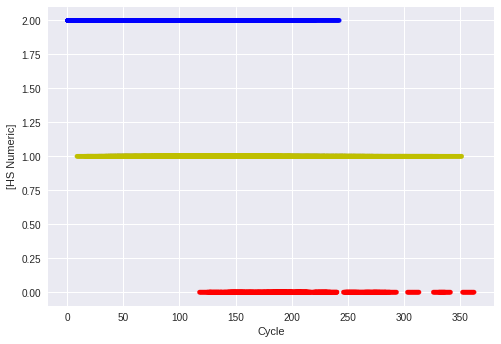

In [ ]:
HS_numeric_FD001 = class_df_FD001.HS.map({'Okay':2, 'Not Okay':0, 'Degradation':1})
col = class_df_FD001.HS.map({'Okay':'b', 'Not Okay':'r', 'Degradation':'y'})
class_df_FD001['HS Numeric'] = HS_numeric_FD001
plt.figure()
class_df_FD001.plot.scatter(x="Cycle", y=["HS Numeric"], color=col)

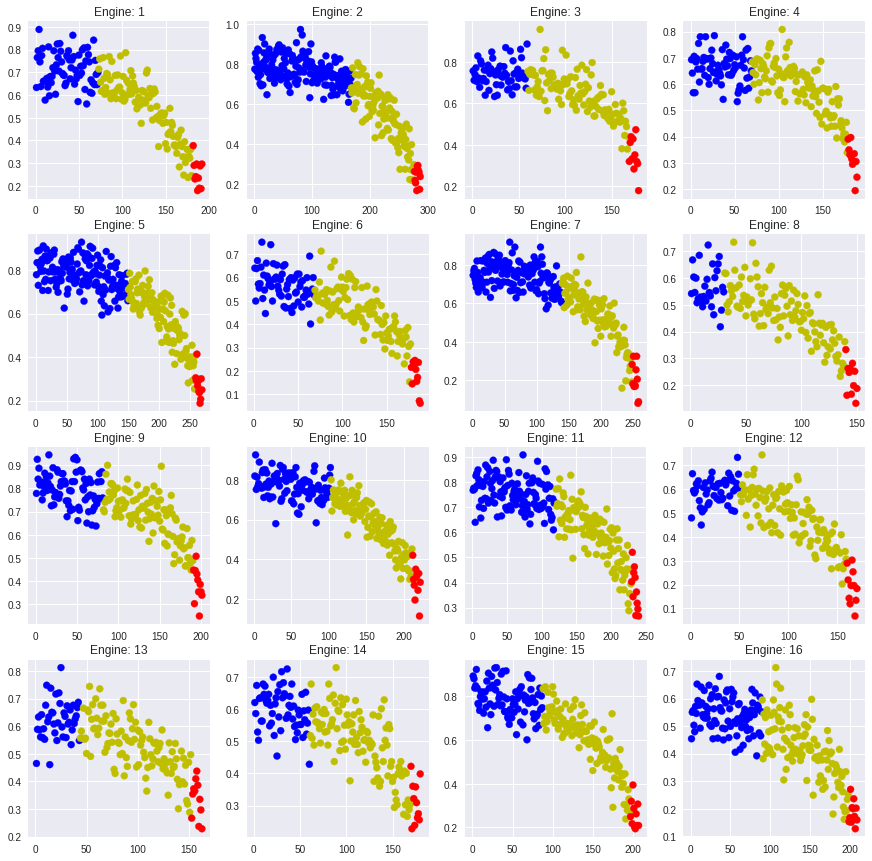

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

<Figure size 576x396 with 0 Axes>

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(15, 15))
engine = 1
sensor = "SensorMeasure12"
for i in range(4):
    for j in range(4):
        col = class_df_FD001[class_df_FD001['ID']==engine].HS.map({'Okay':'b', 'Not Okay':'r', 'Degradation':'y'})
        plt.figure()
        axes[i][j].scatter(class_df_FD001[class_df_FD001["ID"]==engine]["Cycle"], class_df_FD001[class_df_FD001["ID"]==engine][sensor], color=col)
        axes[i][j].title.set_text("Engine: " + str(engine))
        engine += 1

In [ ]:
class_df_FD001.info

<bound method DataFrame.info of         ID  Cycle  RUL  ...  SensorMeasure21        HS  HS Numeric
0        1      1  191  ...         0.724662      Okay           2
1        1      2  190  ...         0.731014      Okay           2
2        1      3  189  ...         0.621375      Okay           2
3        1      4  188  ...         0.662386      Okay           2
4        1      5  187  ...         0.704502      Okay           2
...    ...    ...  ...  ...              ...       ...         ...
20626  100    196    4  ...         0.109500  Not Okay           0
20627  100    197    3  ...         0.366197  Not Okay           0
20628  100    198    2  ...         0.053991  Not Okay           0
20629  100    199    1  ...         0.234466  Not Okay           0
20630  100    200    0  ...         0.218172  Not Okay           0

[20631 rows x 19 columns]>

In [ ]:
test_data_FD001 = pd.read_csv('/content/drive/MyDrive/CMAPSSData/test_FD001.txt', sep = ' ', header = None)
test_data_FD001 = test_data_FD001[[f for f in range(0, 26)]]
test_data_FD001.columns = ["ID", "Cycle", "OpSet1", "OpSet2", "OpSet3", "SensorMeasure1", "SensorMeasure2", "SensorMeasure3", "SensorMeasure4",
                "SensorMeasure5", "SensorMeasure6", "SensorMeasure7", "SensorMeasure8", "SensorMeasure9", "SensorMeasure10", "SensorMeasure11",
                "SensorMeasure12", "SensorMeasure13", "SensorMeasure14", "SensorMeasure15", "SensorMeasure16",
                "SensorMeasure17", "SensorMeasure18", "SensorMeasure19", "SensorMeasure20", "SensorMeasure21"]
test_data_FD001

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,SensorMeasure7,SensorMeasure8,SensorMeasure9,SensorMeasure10,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.20,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.50,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.50,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,1.3,47.28,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01,9044.55,1.3,47.31,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,21.61,553.41,2388.02,9142.37,1.3,47.69,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,21.61,553.22,2388.05,9140.68,1.3,47.60,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,21.61,553.04,2388.11,9146.81,1.3,47.57,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,21.61,553.37,2388.07,9148.85,1.3,47.61,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699


In [ ]:
max_cycles_df_test = test_data_FD001.groupby(["ID"], sort=False)["Cycle"].max().reset_index().rename(columns={"Cycle" : "MaxCycleID"})
max_cycles_df_test

,ID,MaxCycleID
0,1,31
1,2,49
2,3,126
3,4,106
4,5,98
...,...,...
95,96,97
96,97,134
97,98,121
98,99,97


In [ ]:
y_test_rul_FD001 = pd.read_csv('/content/drive/MyDrive/CMAPSSData/RUL_FD001.txt', header = None)
y_test_rul_FD001.columns = ['Eng_rul']
y_test_rul_FD001['ID'] = max_cycles_df_test['ID']
y_test_rul_FD001

,Eng_rul,ID
0,112,1
1,98,2
2,69,3
3,82,4
4,91,5
...,...,...
95,137,96
96,82,97
97,59,98
98,117,99


In [ ]:
max_cycles_df_test['MaxCycleIDAct'] = y_test_rul_FD001['Eng_rul']+ max_cycles_df_test['MaxCycleID']
max_cycles_df_test

,ID,MaxCycleID,MaxCycleIDAct
0,1,31,143
1,2,49,147
2,3,126,195
3,4,106,188
4,5,98,189
...,...,...,...
95,96,97,234
96,97,134,216
97,98,121,180
98,99,97,214


In [ ]:
test_df_FD001 = pd.merge(test_data_FD001, max_cycles_df_test, how="inner", on="ID")
test_df_FD001

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,SensorMeasure7,SensorMeasure8,SensorMeasure9,SensorMeasure10,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,MaxCycleID,MaxCycleIDAct
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.20,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,31,143
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.50,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,31,143
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.50,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,31,143
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,1.3,47.28,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,31,143
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01,9044.55,1.3,47.31,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,31,143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,21.61,553.41,2388.02,9142.37,1.3,47.69,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,198,218
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,21.61,553.22,2388.05,9140.68,1.3,47.60,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,198,218
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,21.61,553.04,2388.11,9146.81,1.3,47.57,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,198,218
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,21.61,553.37,2388.07,9148.85,1.3,47.61,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,198,218


In [ ]:
test_df_FD001["RUL"] = test_df_FD001["MaxCycleIDAct"] - test_df_FD001["Cycle"]
test_df_FD001

,ID,Cycle,OpSet1,OpSet2,OpSet3,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,SensorMeasure7,SensorMeasure8,SensorMeasure9,SensorMeasure10,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21,MaxCycleID,MaxCycleIDAct,RUL
0,1,1,0.0023,0.0003,100.0,518.67,643.02,1585.29,1398.21,14.62,21.61,553.90,2388.04,9050.17,1.3,47.20,521.72,2388.03,8125.55,8.4052,0.03,392,2388,100.0,38.86,23.3735,31,143,142
1,1,2,-0.0027,-0.0003,100.0,518.67,641.71,1588.45,1395.42,14.62,21.61,554.85,2388.01,9054.42,1.3,47.50,522.16,2388.06,8139.62,8.3803,0.03,393,2388,100.0,39.02,23.3916,31,143,141
2,1,3,0.0003,0.0001,100.0,518.67,642.46,1586.94,1401.34,14.62,21.61,554.11,2388.05,9056.96,1.3,47.50,521.97,2388.03,8130.10,8.4441,0.03,393,2388,100.0,39.08,23.4166,31,143,140
3,1,4,0.0042,0.0000,100.0,518.67,642.44,1584.12,1406.42,14.62,21.61,554.07,2388.03,9045.29,1.3,47.28,521.38,2388.05,8132.90,8.3917,0.03,391,2388,100.0,39.00,23.3737,31,143,139
4,1,5,0.0014,0.0000,100.0,518.67,642.51,1587.19,1401.92,14.62,21.61,554.16,2388.01,9044.55,1.3,47.31,522.15,2388.03,8129.54,8.4031,0.03,390,2388,100.0,38.99,23.4130,31,143,138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,0.0049,0.0000,100.0,518.67,643.24,1599.45,1415.79,14.62,21.61,553.41,2388.02,9142.37,1.3,47.69,520.69,2388.00,8213.28,8.4715,0.03,394,2388,100.0,38.65,23.1974,198,218,24
13092,100,195,-0.0011,-0.0001,100.0,518.67,643.22,1595.69,1422.05,14.62,21.61,553.22,2388.05,9140.68,1.3,47.60,521.05,2388.09,8210.85,8.4512,0.03,395,2388,100.0,38.57,23.2771,198,218,23
13093,100,196,-0.0006,-0.0003,100.0,518.67,643.44,1593.15,1406.82,14.62,21.61,553.04,2388.11,9146.81,1.3,47.57,521.18,2388.04,8217.24,8.4569,0.03,395,2388,100.0,38.62,23.2051,198,218,22
13094,100,197,-0.0038,0.0001,100.0,518.67,643.26,1594.99,1419.36,14.62,21.61,553.37,2388.07,9148.85,1.3,47.61,521.33,2388.08,8220.48,8.4711,0.03,395,2388,100.0,38.66,23.2699,198,218,21


In [ ]:
te_df_FD001 = test_df_FD001.copy().drop(columns=["ID", "Cycle", "OpSet1", "OpSet2", "OpSet3", "MaxCycleID", "MaxCycleIDAct","RUL"], axis=1)
print(te_df_FD001)
scaled_te_df_FD001 = pd.DataFrame(scaler.transform(te_df_FD001.values))
scaled_te_df_FD001 = test_df_FD001[["ID", "Cycle", "RUL"]].join(scaled_te_df_FD001)
scaled_te_df_FD001.columns = ["ID", "Cycle","RUL", "SensorMeasure1", "SensorMeasure2", "SensorMeasure3", "SensorMeasure4",
                "SensorMeasure5", "SensorMeasure6", "SensorMeasure7", "SensorMeasure8", "SensorMeasure9", "SensorMeasure10", "SensorMeasure11",
                "SensorMeasure12", "SensorMeasure13", "SensorMeasure14", "SensorMeasure15", "SensorMeasure16",
                "SensorMeasure17", "SensorMeasure18", "SensorMeasure19", "SensorMeasure20", "SensorMeasure21"]
scaled_te_df_FD001

       SensorMeasure1  SensorMeasure2  ...  SensorMeasure20  SensorMeasure21
0              518.67          643.02  ...            38.86          23.3735
1              518.67          641.71  ...            39.02          23.3916
2              518.67          642.46  ...            39.08          23.4166
3              518.67          642.44  ...            39.00          23.3737
4              518.67          642.51  ...            38.99          23.4130
...               ...             ...  ...              ...              ...
13091          518.67          643.24  ...            38.65          23.1974
13092          518.67          643.22  ...            38.57          23.2771
13093          518.67          643.44  ...            38.62          23.2051
13094          518.67          643.26  ...            38.66          23.2699
13095          518.67          642.95  ...            38.70          23.1855

[13096 rows x 21 columns]


,ID,Cycle,RUL,SensorMeasure1,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure5,SensorMeasure6,SensorMeasure7,SensorMeasure8,SensorMeasure9,SensorMeasure10,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure16,SensorMeasure17,SensorMeasure18,SensorMeasure19,SensorMeasure20,SensorMeasure21
0,1,1,142,0.0,0.545181,0.310661,0.269413,0.0,1.0,0.652174,0.212121,0.127614,0.0,0.208333,0.646055,0.220588,0.132160,0.308965,0.0,0.333333,0.0,0.0,0.558140,0.661834
1,1,2,141,0.0,0.150602,0.379551,0.222316,0.0,1.0,0.805153,0.166667,0.146684,0.0,0.386905,0.739872,0.264706,0.204768,0.213159,0.0,0.416667,0.0,0.0,0.682171,0.686827
2,1,3,140,0.0,0.376506,0.346632,0.322248,0.0,1.0,0.685990,0.227273,0.158081,0.0,0.386905,0.699360,0.220588,0.155640,0.458638,0.0,0.416667,0.0,0.0,0.728682,0.721348
3,1,4,139,0.0,0.370482,0.285154,0.408001,0.0,1.0,0.679549,0.196970,0.105717,0.0,0.255952,0.573561,0.250000,0.170090,0.257022,0.0,0.250000,0.0,0.0,0.666667,0.662110
4,1,5,138,0.0,0.391566,0.352082,0.332039,0.0,1.0,0.694042,0.166667,0.102396,0.0,0.273810,0.737740,0.220588,0.152751,0.300885,0.0,0.166667,0.0,0.0,0.658915,0.716377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,24,0.0,0.611446,0.619359,0.566172,0.0,1.0,0.573269,0.181818,0.541326,0.0,0.500000,0.426439,0.176471,0.584890,0.564063,0.0,0.500000,0.0,0.0,0.395349,0.418669
13092,100,195,23,0.0,0.605422,0.537388,0.671843,0.0,1.0,0.542673,0.227273,0.533743,0.0,0.446429,0.503198,0.308824,0.572350,0.485956,0.0,0.583333,0.0,0.0,0.333333,0.528721
13093,100,196,22,0.0,0.671687,0.482014,0.414754,0.0,1.0,0.513688,0.318182,0.561249,0.0,0.428571,0.530917,0.235294,0.605326,0.507888,0.0,0.583333,0.0,0.0,0.372093,0.429301
13094,100,197,21,0.0,0.617470,0.522128,0.626435,0.0,1.0,0.566828,0.257576,0.570403,0.0,0.452381,0.562900,0.294118,0.622046,0.562524,0.0,0.583333,0.0,0.0,0.403101,0.518779


In [ ]:
scaled_clean_te_df_FD001 = scaled_te_df_FD001.drop(columns=["SensorMeasure1", "SensorMeasure5", "SensorMeasure6", "SensorMeasure10",
                                         "SensorMeasure16", "SensorMeasure18", "SensorMeasure19"])
scaled_clean_te_df_FD001

,ID,Cycle,RUL,SensorMeasure2,SensorMeasure3,SensorMeasure4,SensorMeasure7,SensorMeasure8,SensorMeasure9,SensorMeasure11,SensorMeasure12,SensorMeasure13,SensorMeasure14,SensorMeasure15,SensorMeasure17,SensorMeasure20,SensorMeasure21
0,1,1,142,0.545181,0.310661,0.269413,0.652174,0.212121,0.127614,0.208333,0.646055,0.220588,0.132160,0.308965,0.333333,0.558140,0.661834
1,1,2,141,0.150602,0.379551,0.222316,0.805153,0.166667,0.146684,0.386905,0.739872,0.264706,0.204768,0.213159,0.416667,0.682171,0.686827
2,1,3,140,0.376506,0.346632,0.322248,0.685990,0.227273,0.158081,0.386905,0.699360,0.220588,0.155640,0.458638,0.416667,0.728682,0.721348
3,1,4,139,0.370482,0.285154,0.408001,0.679549,0.196970,0.105717,0.255952,0.573561,0.250000,0.170090,0.257022,0.250000,0.666667,0.662110
4,1,5,138,0.391566,0.352082,0.332039,0.694042,0.166667,0.102396,0.273810,0.737740,0.220588,0.152751,0.300885,0.166667,0.658915,0.716377
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13091,100,194,24,0.611446,0.619359,0.566172,0.573269,0.181818,0.541326,0.500000,0.426439,0.176471,0.584890,0.564063,0.500000,0.395349,0.418669
13092,100,195,23,0.605422,0.537388,0.671843,0.542673,0.227273,0.533743,0.446429,0.503198,0.308824,0.572350,0.485956,0.583333,0.333333,0.528721
13093,100,196,22,0.671687,0.482014,0.414754,0.513688,0.318182,0.561249,0.428571,0.530917,0.235294,0.605326,0.507888,0.583333,0.372093,0.429301
13094,100,197,21,0.617470,0.522128,0.626435,0.566828,0.257576,0.570403,0.452381,0.562900,0.294118,0.622046,0.562524,0.583333,0.403101,0.518779


In [ ]:
eng_id = 1
df_tr = scaled_clean_df_FD001[scaled_clean_df_FD001['ID'] == eng_id]
X_tr = df_tr[["SensorMeasure2","SensorMeasure3","SensorMeasure4","SensorMeasure7",
           "SensorMeasure8","SensorMeasure9","SensorMeasure11","SensorMeasure12",
           "SensorMeasure13","SensorMeasure14","SensorMeasure15","SensorMeasure17",
           "SensorMeasure20","SensorMeasure21"]].values
Y_tr = df_tr['RUL'].values
df_te = scaled_clean_te_df_FD001[scaled_clean_te_df_FD001['ID'] == eng_id]
X_te = df_te[["SensorMeasure2","SensorMeasure3","SensorMeasure4","SensorMeasure7",
           "SensorMeasure8","SensorMeasure9","SensorMeasure11","SensorMeasure12",
           "SensorMeasure13","SensorMeasure14","SensorMeasure15","SensorMeasure17",
           "SensorMeasure20","SensorMeasure21"]].values
Y_te = df_te['RUL'].values



# **Linear Regression**

In [ ]:
reg1 = LinearRegression()
reg1.fit(X_tr,Y_tr)
y_pred_1 = reg1.predict(X_te)
metric_reg1 = {'MSE':mean_squared_error(Y_te,y_pred_1), 'RMSE':np.sqrt(mean_squared_error(Y_te,y_pred_1)),
               'MAE':mean_absolute_error(Y_te,y_pred_1), 'R-2':r2_score(Y_te,y_pred_1)}
print(metric_reg1)

{'MSE': 247.00184773538953, 'RMSE': 15.716292429685494, 'MAE': 13.519360239358456, 'R-2': -2.0875230966923692}


**Decision Tree Regressor**

In [ ]:
reg2 = DecisionTreeRegressor(random_state=0)
param_dict = {'criterion':['mse','mae'],
              'splitter':['best','random']}
dt_random = RandomizedSearchCV(reg2,param_dict,verbose=4,cv=5)
dt_random.fit(X_tr,Y_tr)
reg2 = dt_random.best_estimator_
reg2.fit(X_tr,Y_tr)
y_pred_2 = reg2.predict(X_te)
metric_reg2 = {'MSE':mean_squared_error(Y_te,y_pred_2), 'RMSE':np.sqrt(mean_squared_error(Y_te,y_pred_2)),
               'MAE':mean_absolute_error(Y_te,y_pred_2), 'R-2':r2_score(Y_te,y_pred_2)}
print(metric_reg2)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] splitter=best, criterion=mse ....................................
[CV] ...... splitter=best, criterion=mse, score=-17.491, total=   0.0s
[CV] splitter=best, criterion=mse ....................................
[CV] ...... splitter=best, criterion=mse, score=-12.255, total=   0.0s
[CV] splitter=best, criterion=mse ....................................
[CV] ...... splitter=best, criterion=mse, score=-16.841, total=   0.0s
[CV] splitter=best, criterion=mse ....................................
[CV] ....... splitter=best, criterion=mse, score=-8.419, total=   0.0s
[CV] splitter=best, criterion=mse ....................................
[CV] ....... splitter=best, criterion=mse, score=-4.065, total=   0.0s
[CV] splitter=random, criterion=mse ..................................
[CV] .... splitter=random, criterion=mse, score=-17.823, total=   0.0s
[CV] splitter=random, criterion=mse ..................................
[CV] .... splitte

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished


## **Extra Tree Regressor**

In [ ]:
reg3 = ExtraTreeRegressor(random_state=0)
param_dict = {'criterion':['mse','mae'],
              'splitter':['best', 'random']}
et_random = RandomizedSearchCV(reg3,param_dict,verbose=4,cv=5)
et_random.fit(X_tr,Y_tr)
reg3 = et_random.best_estimator_
reg3.fit(X_tr,Y_tr)
y_pred_3 = reg3.predict(X_te)
metric_reg3 = {'MSE':mean_squared_error(Y_te,y_pred_3), 'RMSE':np.sqrt(mean_squared_error(Y_te,y_pred_3)),
               'MAE':mean_absolute_error(Y_te,y_pred_3), 'R-2':r2_score(Y_te,y_pred_3)}
print(metric_reg3)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] splitter=best, criterion=mse ....................................
[CV] ...... splitter=best, criterion=mse, score=-17.491, total=   0.0s
[CV] splitter=best, criterion=mse ....................................
[CV] ...... splitter=best, criterion=mse, score=-12.255, total=   0.0s
[CV] splitter=best, criterion=mse ....................................
[CV] ...... splitter=best, criterion=mse, score=-16.841, total=   0.0s
[CV] splitter=best, criterion=mse ....................................
[CV] ....... splitter=best, criterion=mse, score=-8.419, total=   0.0s
[CV] splitter=best, criterion=mse ....................................
[CV] ....... splitter=best, criterion=mse, score=-4.065, total=   0.0s
[CV] splitter=random, criterion=mse ..................................
[CV] .... splitter=random, criterion=mse, score=-17.823, total=   0.0s
[CV] splitter=random, criterion=mse ..................................
[CV] .... splitte

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.1s finished


## **Random Forest Regressor**

In [ ]:
reg4 = RandomForestRegressor(random_state=0)
param_dict = {'n_estimators':[50,100,150,200],
              'bootstrap':[True,False]}
rf_random = RandomizedSearchCV(reg4,param_dict,verbose=4,cv=5)
rf_random.fit(X_tr,Y_tr)
reg4 = rf_random.best_estimator_
reg4.fit(X_tr,Y_tr)
y_pred_4 = reg4.predict(X_te)
metric_reg4 = {'MSE':mean_squared_error(Y_te,y_pred_4), 'RMSE':np.sqrt(mean_squared_error(Y_te,y_pred_4)),
               'MAE':mean_absolute_error(Y_te,y_pred_4), 'R-2':r2_score(Y_te,y_pred_4)}
print(metric_reg4)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.2s remaining:    0.0s


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] n_estimators=50, bootstrap=True .................................
[CV] ... n_estimators=50, bootstrap=True, score=-16.719, total=   0.1s
[CV] n_estimators=50, bootstrap=True .................................
[CV] .... n_estimators=50, bootstrap=True, score=-2.712, total=   0.1s
[CV] n_estimators=50, bootstrap=True .................................
[CV] .... n_estimators=50, bootstrap=True, score=-7.864, total=   0.1s
[CV] n_estimators=50, bootstrap=True .................................
[CV] .... n_estimators=50, bootstrap=True, score=-3.076, total=   0.1s
[CV] n_estimators=50, bootstrap=True .................................
[CV] .... n_estimators=50, bootstrap=True, score=-4.733, total=   0.1s
[CV] n_estimators=100, bootstrap=True ................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.3s remaining:    0.0s


[CV] .. n_estimators=100, bootstrap=True, score=-16.591, total=   0.2s
[CV] n_estimators=100, bootstrap=True ................................
[CV] ... n_estimators=100, bootstrap=True, score=-2.340, total=   0.2s
[CV] n_estimators=100, bootstrap=True ................................
[CV] ... n_estimators=100, bootstrap=True, score=-7.520, total=   0.2s
[CV] n_estimators=100, bootstrap=True ................................
[CV] ... n_estimators=100, bootstrap=True, score=-2.940, total=   0.2s
[CV] n_estimators=100, bootstrap=True ................................
[CV] ... n_estimators=100, bootstrap=True, score=-4.739, total=   0.2s
[CV] n_estimators=150, bootstrap=True ................................
[CV] .. n_estimators=150, bootstrap=True, score=-16.942, total=   0.2s
[CV] n_estimators=150, bootstrap=True ................................
[CV] ... n_estimators=150, bootstrap=True, score=-2.327, total=   0.3s
[CV] n_estimators=150, bootstrap=True ................................
[CV] .

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:    8.9s finished


{'MSE': 588.1557096774194, 'RMSE': 24.251921772870276, 'MAE': 21.623225806451618, 'R-2': -6.351946370967743}


## **Gradient Boosting Regressor**

In [ ]:
reg5 = GradientBoostingRegressor(random_state=0)
param_dict = {
              'n_estimators': [50,100,150,200],
              'criterion':['mse', 'mae']
              }
gbr_random = RandomizedSearchCV(reg5,param_dict,verbose=4,cv=5)
gbr_random.fit(X_tr,Y_tr)
reg5 = gbr_random.best_estimator_
reg5.fit(X_tr,Y_tr)
y_pred_5 = reg5.predict(X_te)
metric_reg5 = {'MSE':mean_squared_error(Y_te,y_pred_5), 'RMSE':np.sqrt(mean_squared_error(Y_te,y_pred_5)),
               'MAE':mean_absolute_error(Y_te,y_pred_5), 'R-2':r2_score(Y_te,y_pred_5)}
print(metric_reg5)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.1s remaining:    0.0s


Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV] n_estimators=50, criterion=mse ..................................
[CV] .... n_estimators=50, criterion=mse, score=-15.238, total=   0.0s
[CV] n_estimators=50, criterion=mse ..................................
[CV] ..... n_estimators=50, criterion=mse, score=-2.669, total=   0.0s
[CV] n_estimators=50, criterion=mse ..................................
[CV] ..... n_estimators=50, criterion=mse, score=-8.195, total=   0.0s
[CV] n_estimators=50, criterion=mse ..................................
[CV] ..... n_estimators=50, criterion=mse, score=-2.142, total=   0.0s
[CV] n_estimators=50, criterion=mse ..................................
[CV] ..... n_estimators=50, criterion=mse, score=-5.383, total=   0.0s
[CV] n_estimators=100, criterion=mse .................................
[CV] ... n_estimators=100, criterion=mse, score=-15.084, total=   0.1s
[CV] n_estimators=100, criterion=mse .................................
[CV] .... n_estim

[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:   11.2s finished


{'MSE': 808.247292482323, 'RMSE': 28.429690333915406, 'MAE': 24.576964420716383, 'R-2': -9.103091156029038}


## **Extra Trees Regressor**

In [ ]:
reg6 = ExtraTreesRegressor(random_state = 0)
param_dict = {'n_estimators':[50,100,150,200],
              'criterion':['mse', 'mae'],
              'bootstrap':[True,False]
              }
ets_random = RandomizedSearchCV(reg6,param_dict,verbose=4,cv=5)
ets_random.fit(X_tr,Y_tr)
reg6 = ets_random.best_estimator_
reg6.fit(X_tr,Y_tr)
y_pred_6 = reg6.predict(X_te)
metric_reg6 = {'MSE':mean_squared_error(Y_te,y_pred_6), 'RMSE':np.sqrt(mean_squared_error(Y_te,y_pred_6)),
               'MAE':mean_absolute_error(Y_te,y_pred_6), 'R-2':r2_score(Y_te,y_pred_6)}
print(metric_reg6)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=150, criterion=mse, bootstrap=False ................
[CV]  n_estimators=150, criterion=mse, bootstrap=False, score=-16.438, total=   0.2s
[CV] n_estimators=150, criterion=mse, bootstrap=False ................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  n_estimators=150, criterion=mse, bootstrap=False, score=-1.778, total=   0.2s
[CV] n_estimators=150, criterion=mse, bootstrap=False ................
[CV]  n_estimators=150, criterion=mse, bootstrap=False, score=-6.351, total=   0.2s
[CV] n_estimators=150, criterion=mse, bootstrap=False ................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s


[CV]  n_estimators=150, criterion=mse, bootstrap=False, score=-2.486, total=   0.2s
[CV] n_estimators=150, criterion=mse, bootstrap=False ................
[CV]  n_estimators=150, criterion=mse, bootstrap=False, score=-4.891, total=   0.2s
[CV] n_estimators=100, criterion=mae, bootstrap=False ................
[CV]  n_estimators=100, criterion=mae, bootstrap=False, score=-16.551, total=   0.4s
[CV] n_estimators=100, criterion=mae, bootstrap=False ................
[CV]  n_estimators=100, criterion=mae, bootstrap=False, score=-2.059, total=   0.4s
[CV] n_estimators=100, criterion=mae, bootstrap=False ................
[CV]  n_estimators=100, criterion=mae, bootstrap=False, score=-6.629, total=   0.4s
[CV] n_estimators=100, criterion=mae, bootstrap=False ................
[CV]  n_estimators=100, criterion=mae, bootstrap=False, score=-2.612, total=   0.4s
[CV] n_estimators=100, criterion=mae, bootstrap=False ................
[CV]  n_estimators=100, criterion=mae, bootstrap=False, score=-5.039,

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   14.6s finished


## **Ada Boost Regressor**

In [ ]:
reg7 = AdaBoostRegressor(base_estimator = reg2,random_state=0)
param_dict = {'n_estimators': [50,100,150,200],
              'loss': ['linear', 'square', 'exponential']
              }
abr_random = RandomizedSearchCV(reg7,param_dict,verbose=4,cv=5)
abr_random.fit(X_tr,Y_tr)
reg7 = abr_random.best_estimator_
reg7.fit(X_tr,Y_tr)
y_pred_7 = reg7.predict(X_te)
metric_reg7 = {'MSE':mean_squared_error(Y_te,y_pred_7), 'RMSE':np.sqrt(mean_squared_error(Y_te,y_pred_7)),
               'MAE':mean_absolute_error(Y_te,y_pred_7), 'R-2':r2_score(Y_te,y_pred_7)}
print(metric_reg7)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=150, loss=square ...................................
[CV] ..... n_estimators=150, loss=square, score=-13.598, total=   0.2s
[CV] n_estimators=150, loss=square ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] ...... n_estimators=150, loss=square, score=-5.619, total=   0.2s
[CV] n_estimators=150, loss=square ...................................
[CV] ...... n_estimators=150, loss=square, score=-8.383, total=   0.2s
[CV] n_estimators=150, loss=square ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.6s remaining:    0.0s


[CV] ...... n_estimators=150, loss=square, score=-4.355, total=   0.2s
[CV] n_estimators=150, loss=square ...................................
[CV] ..... n_estimators=150, loss=square, score=-10.135, total=   0.2s
[CV] n_estimators=150, loss=exponential ..............................
[CV]  n_estimators=150, loss=exponential, score=-14.583, total=   0.2s
[CV] n_estimators=150, loss=exponential ..............................
[CV] . n_estimators=150, loss=exponential, score=-5.276, total=   0.2s
[CV] n_estimators=150, loss=exponential ..............................
[CV] . n_estimators=150, loss=exponential, score=-9.412, total=   0.2s
[CV] n_estimators=150, loss=exponential ..............................
[CV] . n_estimators=150, loss=exponential, score=-3.987, total=   0.2s
[CV] n_estimators=150, loss=exponential ..............................
[CV] . n_estimators=150, loss=exponential, score=-5.097, total=   0.2s
[CV] n_estimators=200, loss=linear ...................................
[CV] .

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    8.1s finished


## **Bagging Regressor**

In [ ]:
reg8 = BaggingRegressor(base_estimator=reg2,random_state=0)
param_dict = {'n_estimators':[50,100,150,200],
              'bootstrap':[True,False],
              'warm_start':[True,False]}
br_random = RandomizedSearchCV(reg8,param_dict,verbose=4,cv=5)
br_random.fit(X_tr,Y_tr)
reg8 = br_random.best_estimator_
reg8.fit(X_tr,Y_tr)
y_pred_8 = reg8.predict(X_te)
metric_reg8 = {'MSE':mean_squared_error(Y_te,y_pred_8), 'RMSE':np.sqrt(mean_squared_error(Y_te,y_pred_8)),
               'MAE':mean_absolute_error(Y_te,y_pred_8), 'R-2':r2_score(Y_te,y_pred_8)}
print(metric_reg8)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] warm_start=True, n_estimators=100, bootstrap=False ..............
[CV]  warm_start=True, n_estimators=100, bootstrap=False, score=-16.514, total=   0.2s
[CV] warm_start=True, n_estimators=100, bootstrap=False ..............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  warm_start=True, n_estimators=100, bootstrap=False, score=-2.014, total=   0.1s
[CV] warm_start=True, n_estimators=100, bootstrap=False ..............
[CV]  warm_start=True, n_estimators=100, bootstrap=False, score=-6.424, total=   0.1s
[CV] warm_start=True, n_estimators=100, bootstrap=False ..............


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.5s remaining:    0.0s


[CV]  warm_start=True, n_estimators=100, bootstrap=False, score=-2.059, total=   0.1s
[CV] warm_start=True, n_estimators=100, bootstrap=False ..............
[CV]  warm_start=True, n_estimators=100, bootstrap=False, score=-5.021, total=   0.1s
[CV] warm_start=True, n_estimators=50, bootstrap=True ................
[CV]  warm_start=True, n_estimators=50, bootstrap=True, score=-17.879, total=   0.1s
[CV] warm_start=True, n_estimators=50, bootstrap=True ................
[CV]  warm_start=True, n_estimators=50, bootstrap=True, score=-1.371, total=   0.1s
[CV] warm_start=True, n_estimators=50, bootstrap=True ................
[CV]  warm_start=True, n_estimators=50, bootstrap=True, score=-7.288, total=   0.1s
[CV] warm_start=True, n_estimators=50, bootstrap=True ................
[CV]  warm_start=True, n_estimators=50, bootstrap=True, score=-3.196, total=   0.1s
[CV] warm_start=True, n_estimators=50, bootstrap=True ................
[CV]  warm_start=True, n_estimators=50, bootstrap=True, score=-5.

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    8.4s finished
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_bagging.py:352: UserWarning: Warm-start fitting without increasing n_estimators does not fit new trees.
  warn("Warm-start fitting without increasing n_estimators does not "


# **XGB Regressor**

In [ ]:
reg9 = XGBRegressor(random_state=0)
param_dict = {'n_estimators':[50,100,150,200]}
xgbr_random = RandomizedSearchCV(reg9,param_dict,verbose=4,cv=5)
xgbr_random.fit(X_tr,Y_tr)
reg9 = xgbr_random.best_estimator_
reg9.fit(X_tr,Y_tr)
y_pred_9 = reg9.predict(X_te)
metric_reg9 = {'MSE':mean_squared_error(Y_te,y_pred_9), 'RMSE':np.sqrt(mean_squared_error(Y_te,y_pred_9)),
               'MAE':mean_absolute_error(Y_te,y_pred_9), 'R-2':r2_score(Y_te,y_pred_9)}
print(metric_reg9)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.2s remaining:    0.0s


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] n_estimators=50 .................................................
[07:04:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] ................... n_estimators=50, score=-16.749, total=   0.1s
[CV] n_estimators=50 .................................................
[07:04:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... n_estimators=50, score=-3.387, total=   0.0s
[CV] n_estimators=50 .................................................
[07:04:05] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV] .................... n_estimators=50, score=-7.818, total=   0.0s
[CV] n_estimators=50 .................................................
[07:04:05] WARNING: /workspace/src/objective/regression_obj.cu

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.7s finished


In [ ]:
reg10 = LGBMRegressor(random_state=0)
param_dict = {'n_estimators':[50,100,150,200]}
lgbr_random = RandomizedSearchCV(reg10,param_dict,verbose=4,cv=5)
lgbr_random.fit(X_tr,Y_tr)
reg10 = lgbr_random.best_estimator_
reg10.fit(X_tr,Y_tr)
y_pred_10 = reg10.predict(X_te)
metric_reg10 = {'MSE':mean_squared_error(Y_te,y_pred_10), 'RMSE':np.sqrt(mean_squared_error(Y_te,y_pred_10)),
               'MAE':mean_absolute_error(Y_te,y_pred_10), 'R-2':r2_score(Y_te,y_pred_10)}
print(metric_reg10)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV] n_estimators=50 .................................................
[CV] ................... n_estimators=50, score=-15.162, total=   0.0s
[CV] n_estimators=50 .................................................
[CV] .................... n_estimators=50, score=-2.741, total=   0.0s
[CV] n_estimators=50 .................................................
[CV] .................... n_estimators=50, score=-7.543, total=   0.0s
[CV] n_estimators=50 .................................................
[CV] .................... n_estimators=50, score=-1.783, total=   0.0s
[CV] n_estimators=50 .................................................
[CV] .................... n_estimators=50, score=-4.266, total=   0.0s
[CV] n_estimators=100 ................................................
[CV] .................. n_estimators=100, score=-15.054, total=   0.0s
[CV] n_estimators=100 ................................................
[CV] ............

[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:    0.4s finished


## **SVR**

In [ ]:
reg11 = SVR()
param_dict = {'kernel':['linear', 'rbf', 'sigmoid'],
              'gamma':['scale','auto']}
svr_random = RandomizedSearchCV(reg11,param_dict,verbose=4,cv=5)
svr_random.fit(X_tr,Y_tr)
reg11 = svr_random.best_estimator_
reg11.fit(X_tr,Y_tr)
y_pred_11 = reg11.predict(X_te)
metric_reg11 = {'MSE':mean_squared_error(Y_te,y_pred_11), 'RMSE':np.sqrt(mean_squared_error(Y_te,y_pred_11)),
               'MAE':mean_absolute_error(Y_te,y_pred_11), 'R-2':r2_score(Y_te,y_pred_11)}
print(metric_reg11)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] kernel=linear, gamma=scale ......................................
[CV] ........ kernel=linear, gamma=scale, score=-52.685, total=   0.0s
[CV] kernel=linear, gamma=scale ......................................
[CV] ........ kernel=linear, gamma=scale, score=-15.661, total=   0.0s
[CV] kernel=linear, gamma=scale ......................................
[CV] ......... kernel=linear, gamma=scale, score=-0.681, total=   0.0s
[CV] kernel=linear, gamma=scale ......................................
[CV] ........ kernel=linear, gamma=scale, score=-13.440, total=   0.0s
[CV] kernel=linear, gamma=scale ......................................
[CV] ........ kernel=linear, gamma=scale, score=-43.557, total=   0.0s
[CV] kernel=rbf, gamma=scale .........................................
[CV] ........... kernel=rbf, gamma=scale, score=-49.598, total=   0.0s
[CV] kernel=rbf, gamma=scale .........................................
[CV] ........... 

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.1s finished


In [ ]:
reg12 = LinearSVR(random_state=0)
param_dict = {'loss':['epsilon_insensitive', 'squared_epsilon_insensitive']}
lsvr_random = RandomizedSearchCV(reg12,param_dict,verbose=4,cv=5)
lsvr_random.fit(X_tr,Y_tr)
reg12 = lsvr_random.best_estimator_
reg12.fit(X_tr,Y_tr)
y_pred_12 = reg12.predict(X_te)
metric_reg12 = {'MSE':mean_squared_error(Y_te,y_pred_12), 'RMSE':np.sqrt(mean_squared_error(Y_te,y_pred_12)),
               'MAE':mean_absolute_error(Y_te,y_pred_12), 'R-2':r2_score(Y_te,y_pred_12)}
print(metric_reg12)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
[CV] loss=epsilon_insensitive ........................................
[CV] .......... loss=epsilon_insensitive, score=-62.379, total=   0.0s
[CV] loss=epsilon_insensitive ........................................
[CV] .......... loss=epsilon_insensitive, score=-21.217, total=   0.0s
[CV] loss=epsilon_insensitive ........................................
[CV] ........... loss=epsilon_insensitive, score=-2.789, total=   0.0s
[CV] loss=epsilon_insensitive ........................................
[CV] ........... loss=epsilon_insensitive, score=-6.090, total=   0.0s
[CV] loss=epsilon_insensitive ........................................
[CV] .......... loss=epsilon_insensitive, score=-29.080, total=   0.0s
[CV] loss=squared_epsilon_insensitive ................................
[CV] .. loss=squared_epsilon_insensitive, score=-21.981, total=   0.0s
[CV] loss=squared_epsilon_insensitive ................................
[CV] ... loss=squ

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 2 is smaller than n_iter=10. Running 2 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


## **NU-SVR**

In [ ]:
reg13 = NuSVR()
param_dict = {'nu':[0.3,0.5,0.7,0.9],
              'kernel':['linear', 'rbf', 'sigmoid'],
              'gamma':['scale','auto']
              }
nusvr_random = RandomizedSearchCV(reg13,param_dict,verbose=4,cv=5)
nusvr_random.fit(X_tr,Y_tr)
reg13 = nusvr_random.best_estimator_
reg13.fit(X_tr,Y_tr)
y_pred_13 = reg13.predict(X_te)
metric_reg13 = {'MSE':mean_squared_error(Y_te,y_pred_13), 'RMSE':np.sqrt(mean_squared_error(Y_te,y_pred_13)),
               'MAE':mean_absolute_error(Y_te,y_pred_13), 'R-2':r2_score(Y_te,y_pred_13)}
print(metric_reg13)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] nu=0.9, kernel=rbf, gamma=scale .................................
[CV] ... nu=0.9, kernel=rbf, gamma=scale, score=-49.050, total=   0.0s
[CV] nu=0.9, kernel=rbf, gamma=scale .................................
[CV] ... nu=0.9, kernel=rbf, gamma=scale, score=-12.648, total=   0.0s
[CV] nu=0.9, kernel=rbf, gamma=scale .................................
[CV] ..... nu=0.9, kernel=rbf, gamma=scale, score=0.064, total=   0.0s
[CV] nu=0.9, kernel=rbf, gamma=scale .................................
[CV] .... nu=0.9, kernel=rbf, gamma=scale, score=-9.368, total=   0.0s
[CV] nu=0.9, kernel=rbf, gamma=scale .................................
[CV] ... nu=0.9, kernel=rbf, gamma=scale, score=-47.258, total=   0.0s
[CV] nu=0.7, kernel=sigmoid, gamma=auto ..............................
[CV]  nu=0.7, kernel=sigmoid, gamma=auto, score=-70.763, total=   0.0s
[CV] nu=0.7, kernel=sigmoid, gamma=auto ..............................
[CV]  nu=0.7, ke

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.2s finished


## **SGD-Regressor**

In [ ]:
reg14 = SGDRegressor(random_state = 0)
param_dict = {'loss':['huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
              'penalty':['l1','l2','elasticnet'],
              'learning_rate':['constant','optimal','invscaling','adaptive']
              }
sgdr_random = RandomizedSearchCV(reg14,param_dict,verbose=4,cv=5)
sgdr_random.fit(X_tr,Y_tr)
reg14 = sgdr_random.best_estimator_
reg14.fit(X_tr,Y_tr)
y_pred_14 = reg14.predict(X_te)
metric_reg14 = {'MSE':mean_squared_error(Y_te,y_pred_14), 'RMSE':np.sqrt(mean_squared_error(Y_te,y_pred_14)),
               'MAE':mean_absolute_error(Y_te,y_pred_14), 'R-2':r2_score(Y_te,y_pred_14)}
print(metric_reg14)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] penalty=elasticnet, loss=huber, learning_rate=invscaling ........
[CV]  penalty=elasticnet, loss=huber, learning_rate=invscaling, score=-161.726, total=   0.0s
[CV] penalty=elasticnet, loss=huber, learning_rate=invscaling ........
[CV]  penalty=elasticnet, loss=huber, learning_rate=invscaling, score=-85.839, total=   0.0s
[CV] penalty=elasticnet, loss=huber, learning_rate=invscaling ........
[CV]  penalty=elasticnet, loss=huber, learning_rate=invscaling, score=-35.701, total=   0.0s
[CV] penalty=elasticnet, loss=huber, learning_rate=invscaling ........
[CV]  penalty=elasticnet, loss=huber, learning_rate=invscaling, score=-6.423, total=   0.0s
[CV] penalty=elasticnet, loss=huber, learning_rate=invscaling ........
[CV]  penalty=elasticnet, loss=huber, learning_rate=invscaling, score=-2.711, total=   0.0s
[CV] penalty=l2, loss=huber, learning_rate=invscaling ................
[CV]  penalty=l2, loss=huber, learning_rate=invsc

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.1s remaining:    0.0s
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
[Parallel(n_jobs=1)]: Done   3 out of   3 | elap

[CV]  penalty=l2, loss=huber, learning_rate=invscaling, score=-6.426, total=   0.0s
[CV] penalty=l2, loss=huber, learning_rate=invscaling ................
[CV]  penalty=l2, loss=huber, learning_rate=invscaling, score=-2.708, total=   0.0s
[CV] penalty=l2, loss=epsilon_insensitive, learning_rate=adaptive ....
[CV]  penalty=l2, loss=epsilon_insensitive, learning_rate=adaptive, score=-23.570, total=   0.0s
[CV] penalty=l2, loss=epsilon_insensitive, learning_rate=adaptive ....
[CV]  penalty=l2, loss=epsilon_insensitive, learning_rate=adaptive, score=-4.400, total=   0.0s
[CV] penalty=l2, loss=epsilon_insensitive, learning_rate=adaptive ....
[CV]  penalty=l2, loss=epsilon_insensitive, learning_rate=adaptive, score=-3.833, total=   0.0s
[CV] penalty=l2, loss=epsilon_insensitive, learning_rate=adaptive ....
[CV]  penalty=l2, loss=epsilon_insensitive, learning_rate=adaptive, score=-5.271, total=   0.0s
[CV] penalty=l2, loss=epsilon_insensitive, learning_rate=adaptive ....
[CV]  penalty=l2, los

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1187: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    0.6s finished


In [ ]:
res_reg1,res_reg2,res_reg3,res_reg4,res_reg5,res_reg6,res_reg7 = [],[],[],[],[],[],[]
res_reg8,res_reg9,res_reg10,res_reg11,res_reg12,res_reg13,res_reg14 = [],[],[],[],[],[],[]
for i in range(1,101):
  eng_id = i
  df_tr = scaled_clean_df_FD001[scaled_clean_df_FD001['ID'] == eng_id]
  X_tr = df_tr[["SensorMeasure2","SensorMeasure3","SensorMeasure4","SensorMeasure7",
           "SensorMeasure8","SensorMeasure9","SensorMeasure11","SensorMeasure12",
           "SensorMeasure13","SensorMeasure14","SensorMeasure15","SensorMeasure17",
           "SensorMeasure20","SensorMeasure21"]].values
  Y_tr = df_tr['RUL'].values
  df_te = scaled_clean_te_df_FD001[scaled_clean_te_df_FD001['ID'] == eng_id]
  X_te = df_te[["SensorMeasure2","SensorMeasure3","SensorMeasure4","SensorMeasure7",
           "SensorMeasure8","SensorMeasure9","SensorMeasure11","SensorMeasure12",
           "SensorMeasure13","SensorMeasure14","SensorMeasure15","SensorMeasure17",
           "SensorMeasure20","SensorMeasure21"]].values
  Y_te = df_te['RUL'].values
  ##########################################
  reg1 = LinearRegression()
  reg1.fit(X_tr,Y_tr)
  y_pred_1 = reg1.predict(X_te)
  metric_reg1 = {'MSE':mean_squared_error(Y_te,y_pred_1), 'RMSE':np.sqrt(mean_squared_error(Y_te,y_pred_1)),
               'MAE':mean_absolute_error(Y_te,y_pred_1), 'R-2':r2_score(Y_te,y_pred_1)}
  res_reg1.append(metric_reg1)
  ###########################################
  reg2 = DecisionTreeRegressor(random_state=0)
  param_dict = {'criterion':['mse','mae'],
              'splitter':['best','random']}
  dt_random = RandomizedSearchCV(reg2,param_dict,verbose=4,cv=5)
  dt_random.fit(X_tr,Y_tr)
  reg2 = dt_random.best_estimator_
  reg2.fit(X_tr,Y_tr)
  y_pred_2 = reg2.predict(X_te)
  metric_reg2 = {'MSE':mean_squared_error(Y_te,y_pred_2), 'RMSE':np.sqrt(mean_squared_error(Y_te,y_pred_2)),
               'MAE':mean_absolute_error(Y_te,y_pred_2), 'R-2':r2_score(Y_te,y_pred_2)}
  res_reg2.append(metric_reg2)
  ##############################################
  reg3 = ExtraTreeRegressor(random_state=0)
  param_dict = {'criterion':['mse','mae'],
              'splitter':['best', 'random']}
  et_random = RandomizedSearchCV(reg3,param_dict,verbose=4,cv=5)
  et_random.fit(X_tr,Y_tr)
  reg3 = et_random.best_estimator_
  reg3.fit(X_tr,Y_tr)
  y_pred_3 = reg3.predict(X_te)
  metric_reg3 = {'MSE':mean_squared_error(Y_te,y_pred_3), 'RMSE':np.sqrt(mean_squared_error(Y_te,y_pred_3)),
               'MAE':mean_absolute_error(Y_te,y_pred_3), 'R-2':r2_score(Y_te,y_pred_3)}
  res_reg3.append(metric_reg3)
  #################################################
  reg4 = RandomForestRegressor(random_state=0)
  param_dict = {'n_estimators':[50,100,150,200],
              'bootstrap':[True,False]}
  rf_random = RandomizedSearchCV(reg4,param_dict,verbose=4,cv=5)
  rf_random.fit(X_tr,Y_tr)
  reg4 = rf_random.best_estimator_
  reg4.fit(X_tr,Y_tr)
  y_pred_4 = reg4.predict(X_te)
  metric_reg4 = {'MSE':mean_squared_error(Y_te,y_pred_4), 'RMSE':np.sqrt(mean_squared_error(Y_te,y_pred_4)),
               'MAE':mean_absolute_error(Y_te,y_pred_4), 'R-2':r2_score(Y_te,y_pred_4)}
  res_reg4.append(metric_reg4)
  ###################################################
  reg5 = GradientBoostingRegressor(random_state=0)
  param_dict = {
              'n_estimators': [50,100,150,200],
              'criterion':['mse', 'mae']
              }
  gbr_random = RandomizedSearchCV(reg5,param_dict,verbose=4,cv=5)
  gbr_random.fit(X_tr,Y_tr)
  reg5 = gbr_random.best_estimator_
  reg5.fit(X_tr,Y_tr)
  y_pred_5 = reg5.predict(X_te)
  metric_reg5 = {'MSE':mean_squared_error(Y_te,y_pred_5), 'RMSE':np.sqrt(mean_squared_error(Y_te,y_pred_5)),
               'MAE':mean_absolute_error(Y_te,y_pred_5), 'R-2':r2_score(Y_te,y_pred_5)}
  res_reg5.append(metric_reg5)
  #######################################################
  reg6 = ExtraTreesRegressor(random_state = 0)
  param_dict = {'n_estimators':[50,100,150,200],
              'criterion':['mse', 'mae'],
              'bootstrap':[True,False]
              }
  ets_random = RandomizedSearchCV(reg6,param_dict,verbose=4,cv=5)
  ets_random.fit(X_tr,Y_tr)
  reg6 = ets_random.best_estimator_
  reg6.fit(X_tr,Y_tr)
  y_pred_6 = reg6.predict(X_te)
  metric_reg6 = {'MSE':mean_squared_error(Y_te,y_pred_6), 'RMSE':np.sqrt(mean_squared_error(Y_te,y_pred_6)),
               'MAE':mean_absolute_error(Y_te,y_pred_6), 'R-2':r2_score(Y_te,y_pred_6)}
  res_reg6.append(metric_reg6)
  ###########################################################
  reg7 = AdaBoostRegressor(base_estimator = reg2,random_state=0)
  param_dict = {'n_estimators': [50,100,150,200],
              'loss': ['linear', 'square', 'exponential']
              }
  abr_random = RandomizedSearchCV(reg7,param_dict,verbose=4,cv=5)
  abr_random.fit(X_tr,Y_tr)
  reg7 = abr_random.best_estimator_
  reg7.fit(X_tr,Y_tr)
  y_pred_7 = reg7.predict(X_te)
  metric_reg7 = {'MSE':mean_squared_error(Y_te,y_pred_7), 'RMSE':np.sqrt(mean_squared_error(Y_te,y_pred_7)),
               'MAE':mean_absolute_error(Y_te,y_pred_7), 'R-2':r2_score(Y_te,y_pred_7)}
  res_reg7.append(metric_reg7)
  ############################################################
  reg8 = BaggingRegressor(base_estimator=reg2,random_state=0)
  param_dict = {'n_estimators':[50,100,150,200],
              'bootstrap':[True,False],
              'warm_start':[True,False]}
  br_random = RandomizedSearchCV(reg8,param_dict,verbose=4,cv=5)
  br_random.fit(X_tr,Y_tr)
  reg8 = br_random.best_estimator_
  reg8.fit(X_tr,Y_tr)
  y_pred_8 = reg8.predict(X_te)
  metric_reg8 = {'MSE':mean_squared_error(Y_te,y_pred_8), 'RMSE':np.sqrt(mean_squared_error(Y_te,y_pred_8)),
               'MAE':mean_absolute_error(Y_te,y_pred_8), 'R-2':r2_score(Y_te,y_pred_8)}
  res_reg8.append(metric_reg8)
  ##############################################################
  reg9 = XGBRegressor(random_state=0)
  param_dict = {'n_estimators':[50,100,150,200]}
  xgbr_random = RandomizedSearchCV(reg9,param_dict,verbose=4,cv=5)
  xgbr_random.fit(X_tr,Y_tr)
  reg9 = xgbr_random.best_estimator_
  reg9.fit(X_tr,Y_tr)
  y_pred_9 = reg9.predict(X_te)
  metric_reg9 = {'MSE':mean_squared_error(Y_te,y_pred_9), 'RMSE':np.sqrt(mean_squared_error(Y_te,y_pred_9)),
               'MAE':mean_absolute_error(Y_te,y_pred_9), 'R-2':r2_score(Y_te,y_pred_9)}
  res_reg9.append(metric_reg9)
  ####################################################################
  reg10 = LGBMRegressor(random_state=0)
  param_dict = {'n_estimators':[50,100,150,200]}
  lgbr_random = RandomizedSearchCV(reg10,param_dict,verbose=4,cv=5)
  lgbr_random.fit(X_tr,Y_tr)
  reg10 = lgbr_random.best_estimator_
  reg10.fit(X_tr,Y_tr)
  y_pred_10 = reg10.predict(X_te)
  metric_reg10 = {'MSE':mean_squared_error(Y_te,y_pred_10), 'RMSE':np.sqrt(mean_squared_error(Y_te,y_pred_10)),
                'MAE':mean_absolute_error(Y_te,y_pred_10), 'R-2':r2_score(Y_te,y_pred_10)}
  res_reg10.append(metric_reg10)
  ####################################################################
  reg11 = SVR()
  param_dict = {'kernel':['linear', 'rbf', 'sigmoid'],
                'gamma':['scale','auto']}
  svr_random = RandomizedSearchCV(reg11,param_dict,verbose=4,cv=5)
  svr_random.fit(X_tr,Y_tr)
  reg11 = svr_random.best_estimator_
  reg11.fit(X_tr,Y_tr)
  y_pred_11 = reg11.predict(X_te)
  metric_reg11 = {'MSE':mean_squared_error(Y_te,y_pred_11), 'RMSE':np.sqrt(mean_squared_error(Y_te,y_pred_11)),
                'MAE':mean_absolute_error(Y_te,y_pred_11), 'R-2':r2_score(Y_te,y_pred_11)}
  res_reg11.append(metric_reg11)
  ######################################################################
  reg12 = LinearSVR(random_state=0)
  param_dict = {'loss':['epsilon_insensitive', 'squared_epsilon_insensitive']}
  lsvr_random = RandomizedSearchCV(reg12,param_dict,verbose=4,cv=5)
  lsvr_random.fit(X_tr,Y_tr)
  reg12 = lsvr_random.best_estimator_
  reg12.fit(X_tr,Y_tr)
  y_pred_12 = reg12.predict(X_te)
  metric_reg12 = {'MSE':mean_squared_error(Y_te,y_pred_12), 'RMSE':np.sqrt(mean_squared_error(Y_te,y_pred_12)),
                'MAE':mean_absolute_error(Y_te,y_pred_12), 'R-2':r2_score(Y_te,y_pred_12)}
  res_reg12.append(metric_reg12)
  ###########################################################################
  reg13 = NuSVR()
  param_dict = {'nu':[0.3,0.5,0.7,0.9],
                'kernel':['linear', 'rbf', 'sigmoid'],
                'gamma':['scale','auto']
                }
  nusvr_random = RandomizedSearchCV(reg13,param_dict,verbose=4,cv=5)
  nusvr_random.fit(X_tr,Y_tr)
  reg13 = nusvr_random.best_estimator_
  reg13.fit(X_tr,Y_tr)
  y_pred_13 = reg13.predict(X_te)
  metric_reg13 = {'MSE':mean_squared_error(Y_te,y_pred_13), 'RMSE':np.sqrt(mean_squared_error(Y_te,y_pred_13)),
                'MAE':mean_absolute_error(Y_te,y_pred_13), 'R-2':r2_score(Y_te,y_pred_13)}
  res_reg13.append(metric_reg13)
  ###########################################################################
  reg14 = SGDRegressor(random_state = 0)
  param_dict = {'loss':['huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'],
                'penalty':['l1','l2','elasticnet'],
                'learning_rate':['constant','optimal','invscaling','adaptive']
                }
  sgdr_random = RandomizedSearchCV(reg14,param_dict,verbose=4,cv=5)
  sgdr_random.fit(X_tr,Y_tr)
  reg14 = sgdr_random.best_estimator_
  reg14.fit(X_tr,Y_tr)
  y_pred_14 = reg14.predict(X_te)
  metric_reg14 = {'MSE':mean_squared_error(Y_te,y_pred_14), 'RMSE':np.sqrt(mean_squared_error(Y_te,y_pred_14)),
                'MAE':mean_absolute_error(Y_te,y_pred_14), 'R-2':r2_score(Y_te,y_pred_14)}
  res_reg14.append(metric_reg14)

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
Res_reg1 = {'MSE':[],
            'MAE':[],
            'R-2':[],
            'RMSE':[]}
for i in range(len(res_reg1)):
  Res_reg1['MAE'].append(res_reg1[i]['MAE'])
  Res_reg1['MSE'].append(res_reg1[i]['MSE'])
  Res_reg1['RMSE'].append(res_reg1[i]['RMSE'])
  Res_reg1['R-2'].append(res_reg1[i]['R-2'])

df_res_reg1 = pd.DataFrame(Res_reg1,index = max_cycles_df_test['ID'])
df_res_reg1.to_csv('/content/drive/MyDrive/CMAPSSData/FD001_reg1.csv')

In [ ]:
Res_reg2 = {'MSE':[],
            'MAE':[],
            'R-2':[],
            'RMSE':[]}
for i in range(len(res_reg2)):
  Res_reg2['MAE'].append(res_reg2[i]['MAE'])
  Res_reg2['MSE'].append(res_reg2[i]['MSE'])
  Res_reg2['RMSE'].append(res_reg2[i]['RMSE'])
  Res_reg2['R-2'].append(res_reg2[i]['R-2'])

df_res_reg2 = pd.DataFrame(Res_reg2,index = max_cycles_df_test['ID'])
df_res_reg2.to_csv('/content/drive/MyDrive/CMAPSSData/FD001_reg2.csv')

In [ ]:
Res_reg3 = {'MSE':[],
            'MAE':[],
            'R-2':[],
            'RMSE':[]}
for i in range(len(res_reg3)):
  Res_reg3['MAE'].append(res_reg3[i]['MAE'])
  Res_reg3['MSE'].append(res_reg3[i]['MSE'])
  Res_reg3['RMSE'].append(res_reg3[i]['RMSE'])
  Res_reg3['R-2'].append(res_reg3[i]['R-2'])

df_res_reg3 = pd.DataFrame(Res_reg3,index = max_cycles_df_test['ID'])
df_res_reg3.to_csv('/content/drive/MyDrive/CMAPSSData/FD001_reg3.csv')

In [ ]:
Res_reg4 = {'MSE':[],
            'MAE':[],
            'R-2':[],
            'RMSE':[]}
for i in range(len(res_reg4)):
  Res_reg4['MAE'].append(res_reg4[i]['MAE'])
  Res_reg4['MSE'].append(res_reg4[i]['MSE'])
  Res_reg4['RMSE'].append(res_reg4[i]['RMSE'])
  Res_reg4['R-2'].append(res_reg4[i]['R-2'])

df_res_reg4 = pd.DataFrame(Res_reg4,index = max_cycles_df_test['ID'])
df_res_reg4.to_csv('/content/drive/MyDrive/CMAPSSData/FD001_reg4.csv')

In [ ]:
Res_reg5 = {'MSE':[],
            'MAE':[],
            'R-2':[],
            'RMSE':[]}
for i in range(len(res_reg5)):
  Res_reg5['MAE'].append(res_reg5[i]['MAE'])
  Res_reg5['MSE'].append(res_reg5[i]['MSE'])
  Res_reg5['RMSE'].append(res_reg5[i]['RMSE'])
  Res_reg5['R-2'].append(res_reg5[i]['R-2'])

df_res_reg5 = pd.DataFrame(Res_reg5,index = max_cycles_df_test['ID'])
df_res_reg5.to_csv('/content/drive/MyDrive/CMAPSSData/FD001_reg5.csv')

In [ ]:
Res_reg6 = {'MSE':[],
            'MAE':[],
            'R-2':[],
            'RMSE':[]}
for i in range(len(res_reg6)):
  Res_reg6['MAE'].append(res_reg6[i]['MAE'])
  Res_reg6['MSE'].append(res_reg6[i]['MSE'])
  Res_reg6['RMSE'].append(res_reg6[i]['RMSE'])
  Res_reg6['R-2'].append(res_reg6[i]['R-2'])

df_res_reg6 = pd.DataFrame(Res_reg6,index = max_cycles_df_test['ID'])
df_res_reg6.to_csv('/content/drive/MyDrive/CMAPSSData/FD001_reg6.csv')

In [ ]:
Res_reg7 = {'MSE':[],
            'MAE':[],
            'R-2':[],
            'RMSE':[]}
for i in range(len(res_reg7)):
  Res_reg7['MAE'].append(res_reg7[i]['MAE'])
  Res_reg7['MSE'].append(res_reg7[i]['MSE'])
  Res_reg7['RMSE'].append(res_reg7[i]['RMSE'])
  Res_reg7['R-2'].append(res_reg7[i]['R-2'])

df_res_reg7 = pd.DataFrame(Res_reg7,index = max_cycles_df_test['ID'])
df_res_reg7.to_csv('/content/drive/MyDrive/CMAPSSData/FD001_reg7.csv')

In [ ]:
Res_reg8 = {'MSE':[],
            'MAE':[],
            'R-2':[],
            'RMSE':[]}
for i in range(len(res_reg8)):
  Res_reg8['MAE'].append(res_reg8[i]['MAE'])
  Res_reg8['MSE'].append(res_reg8[i]['MSE'])
  Res_reg8['RMSE'].append(res_reg8[i]['RMSE'])
  Res_reg8['R-2'].append(res_reg8[i]['R-2'])

df_res_reg8 = pd.DataFrame(Res_reg8,index = max_cycles_df_test['ID'])
df_res_reg8.to_csv('/content/drive/MyDrive/CMAPSSData/FD001_reg8.csv')

In [ ]:
Res_reg9 = {'MSE':[],
            'MAE':[],
            'R-2':[],
            'RMSE':[]}
for i in range(len(res_reg9)):
  Res_reg9['MAE'].append(res_reg9[i]['MAE'])
  Res_reg9['MSE'].append(res_reg9[i]['MSE'])
  Res_reg9['RMSE'].append(res_reg9[i]['RMSE'])
  Res_reg9['R-2'].append(res_reg9[i]['R-2'])

df_res_reg9 = pd.DataFrame(Res_reg9,index = max_cycles_df_test['ID'])
df_res_reg9.to_csv('/content/drive/MyDrive/CMAPSSData/FD001_reg9.csv')

In [ ]:
Res_reg10 = {'MSE':[],
            'MAE':[],
            'R-2':[],
            'RMSE':[]}
for i in range(len(res_reg10)):
  Res_reg10['MAE'].append(res_reg10[i]['MAE'])
  Res_reg10['MSE'].append(res_reg10[i]['MSE'])
  Res_reg10['RMSE'].append(res_reg10[i]['RMSE'])
  Res_reg10['R-2'].append(res_reg10[i]['R-2'])

df_res_reg10 = pd.DataFrame(Res_reg10,index = max_cycles_df_test['ID'])
df_res_reg10.to_csv('/content/drive/MyDrive/CMAPSSData/FD001_reg10.csv')

In [ ]:
Res_reg11 = {'MSE':[],
            'MAE':[],
            'R-2':[],
            'RMSE':[]}
for i in range(len(res_reg11)):
  Res_reg11['MAE'].append(res_reg11[i]['MAE'])
  Res_reg11['MSE'].append(res_reg11[i]['MSE'])
  Res_reg11['RMSE'].append(res_reg11[i]['RMSE'])
  Res_reg11['R-2'].append(res_reg11[i]['R-2'])

df_res_reg11 = pd.DataFrame(Res_reg11,index = max_cycles_df_test['ID'])
df_res_reg11.to_csv('/content/drive/MyDrive/CMAPSSData/FD001_reg11.csv')

In [ ]:
Res_reg12 = {'MSE':[],
            'MAE':[],
            'R-2':[],
            'RMSE':[]}
for i in range(len(res_reg12)):
  Res_reg12['MAE'].append(res_reg12[i]['MAE'])
  Res_reg12['MSE'].append(res_reg12[i]['MSE'])
  Res_reg12['RMSE'].append(res_reg12[i]['RMSE'])
  Res_reg12['R-2'].append(res_reg12[i]['R-2'])

df_res_reg12 = pd.DataFrame(Res_reg12,index = max_cycles_df_test['ID'])
df_res_reg12.to_csv('/content/drive/MyDrive/CMAPSSData/FD001_reg12.csv')

In [ ]:
Res_reg13 = {'MSE':[],
            'MAE':[],
            'R-2':[],
            'RMSE':[]}
for i in range(len(res_reg13)):
  Res_reg13['MAE'].append(res_reg13[i]['MAE'])
  Res_reg13['MSE'].append(res_reg13[i]['MSE'])
  Res_reg13['RMSE'].append(res_reg13[i]['RMSE'])
  Res_reg13['R-2'].append(res_reg13[i]['R-2'])

df_res_reg13 = pd.DataFrame(Res_reg13,index = max_cycles_df_test['ID'])
df_res_reg13.to_csv('/content/drive/MyDrive/CMAPSSData/FD001_reg13.csv')

In [ ]:
Res_reg14 = {'MSE':[],
            'MAE':[],
            'R-2':[],
            'RMSE':[]}
for i in range(len(res_reg14)):
  Res_reg14['MAE'].append(res_reg14[i]['MAE'])
  Res_reg14['MSE'].append(res_reg14[i]['MSE'])
  Res_reg14['RMSE'].append(res_reg14[i]['RMSE'])
  Res_reg14['R-2'].append(res_reg14[i]['R-2'])

df_res_reg14 = pd.DataFrame(Res_reg14,index = max_cycles_df_test['ID'])
df_res_reg14.to_csv('/content/drive/MyDrive/CMAPSSData/FD001_reg14.csv')